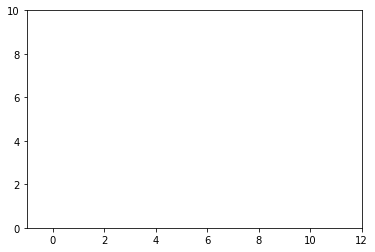

Reading landmark positions
Reading sensor data


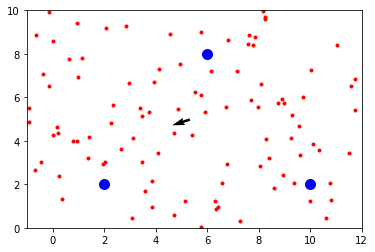

looped


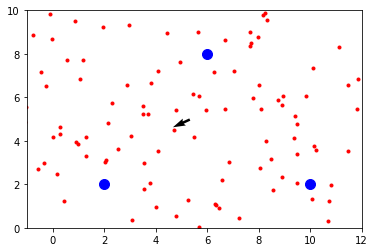

looped


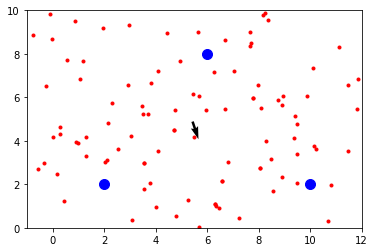

looped


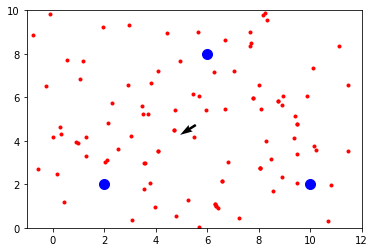

looped


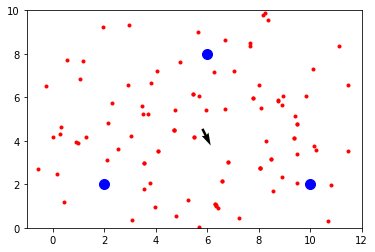

looped


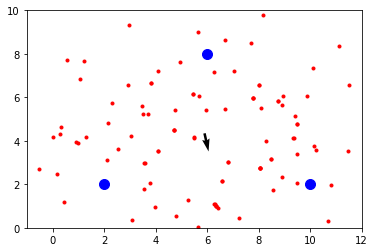

looped


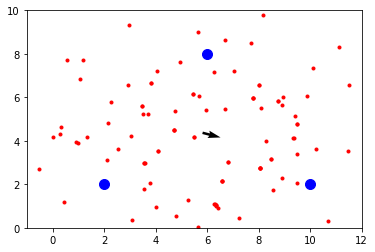

looped


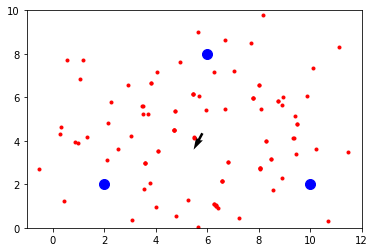

looped


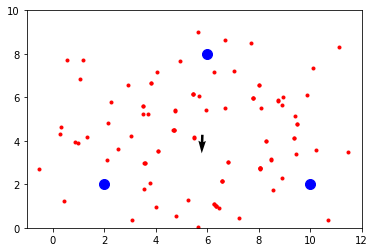

looped


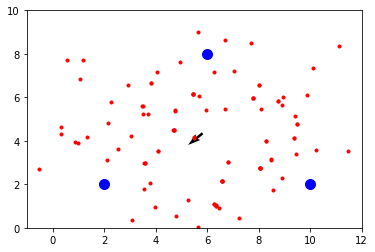

looped


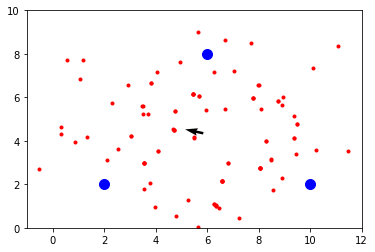

looped


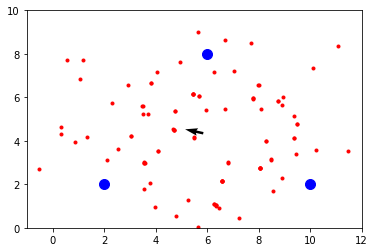

looped


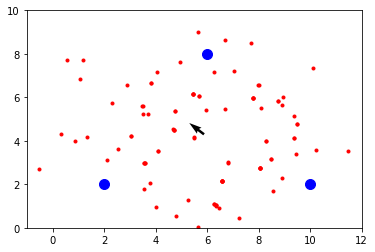

looped


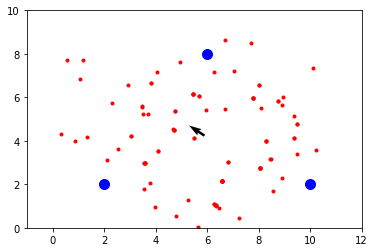

looped


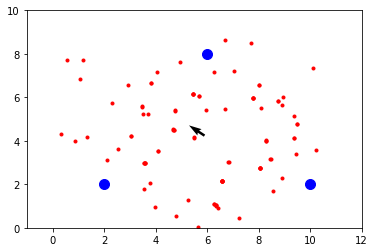

looped


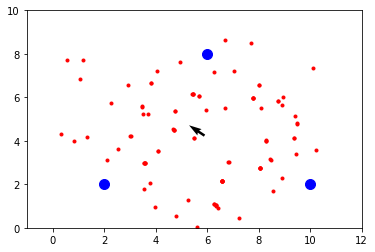

looped


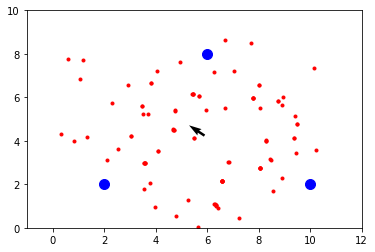

looped


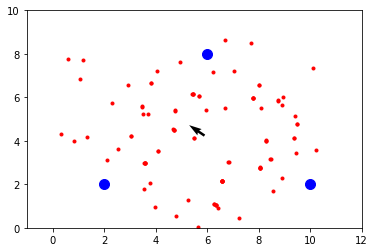

looped


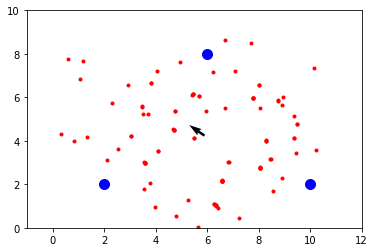

looped


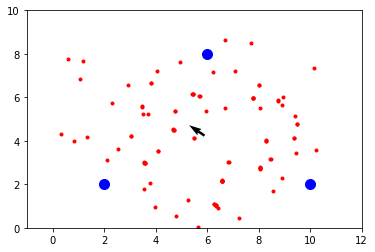

looped


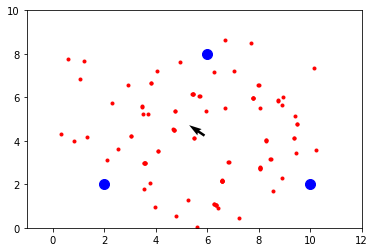

looped


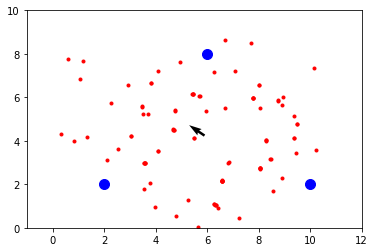

looped


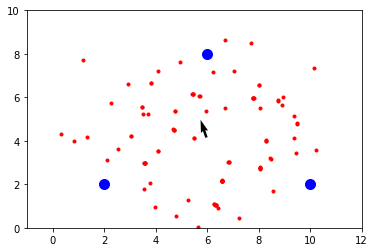

looped


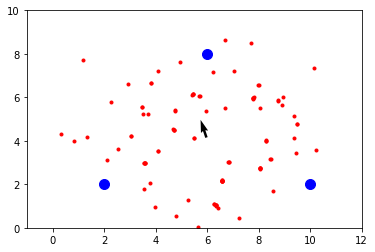

looped


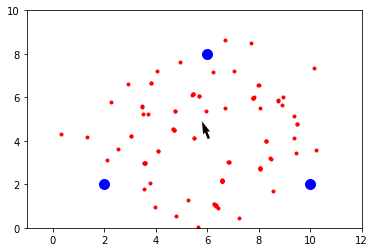

looped


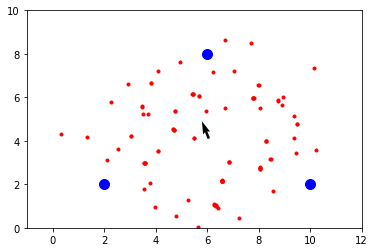

looped


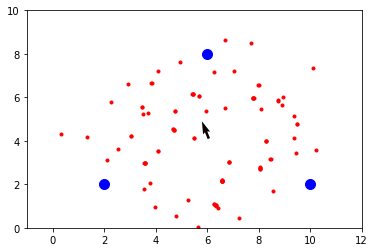

looped


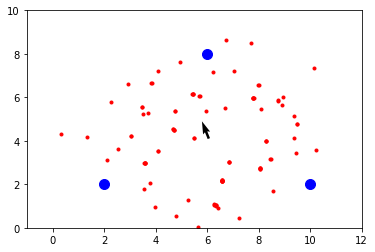

looped


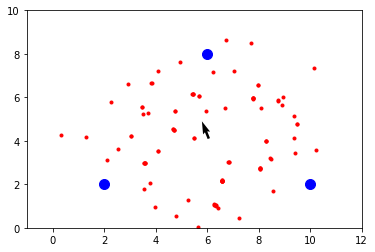

looped


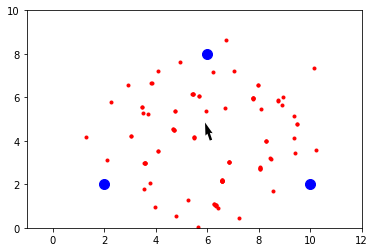

looped


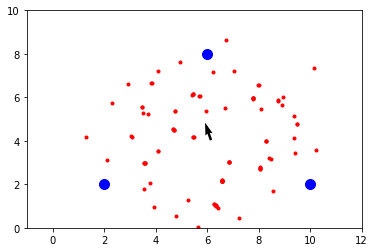

looped


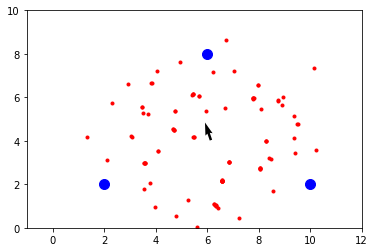

looped


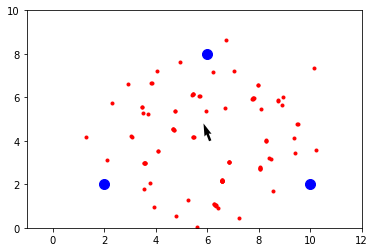

looped


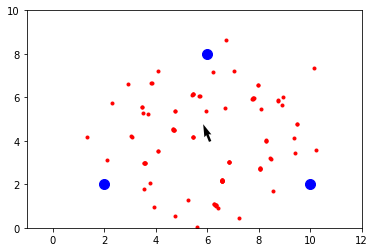

looped


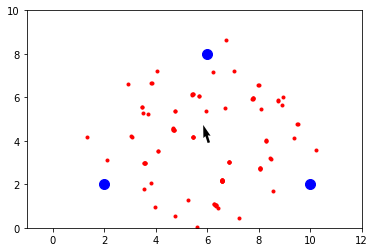

looped


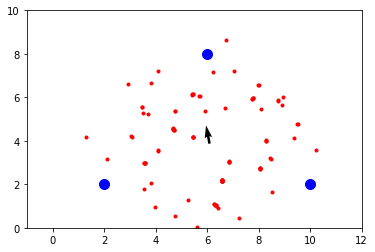

looped


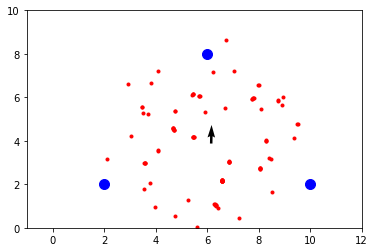

looped


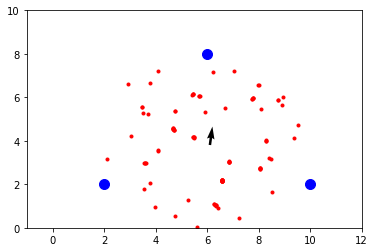

looped


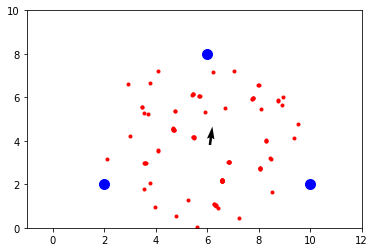

looped


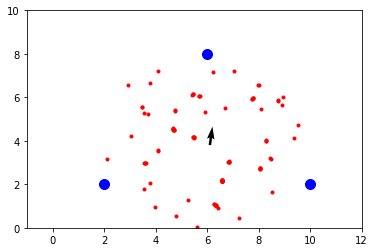

looped


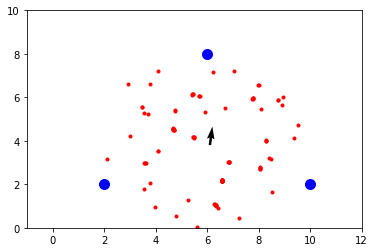

looped


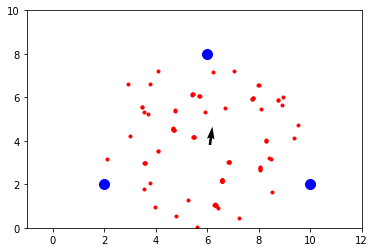

looped


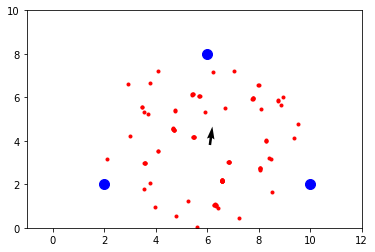

looped


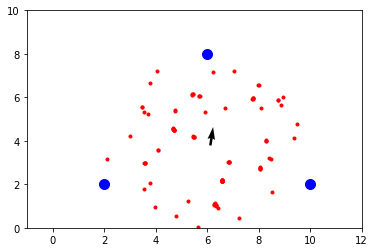

looped


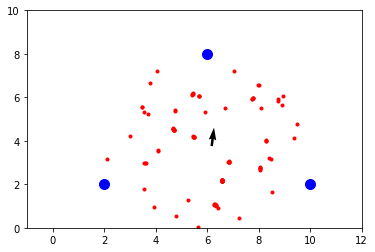

looped


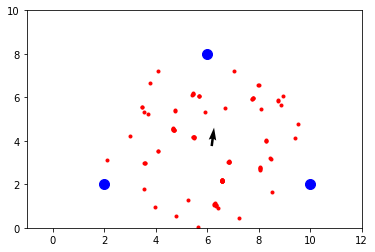

looped


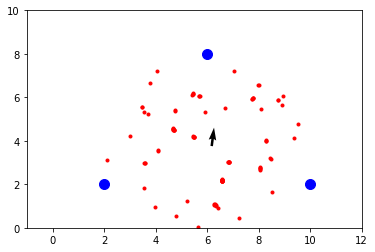

looped


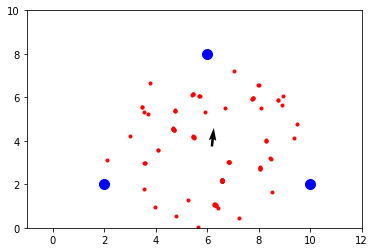

looped


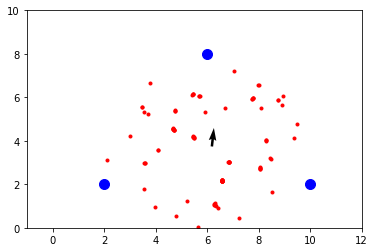

looped


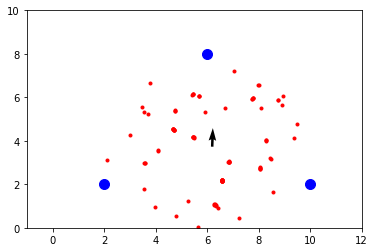

looped


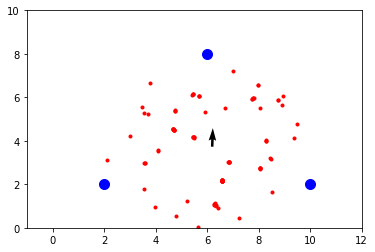

looped


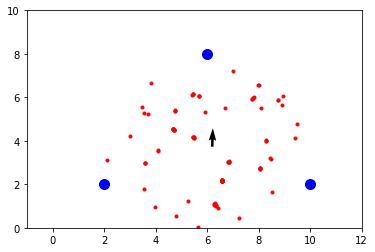

looped


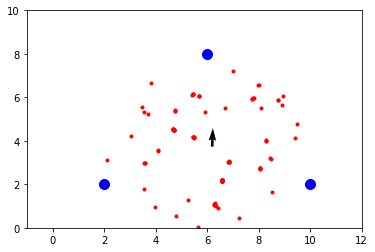

looped


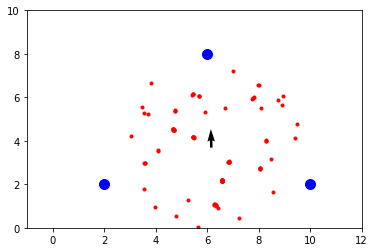

looped


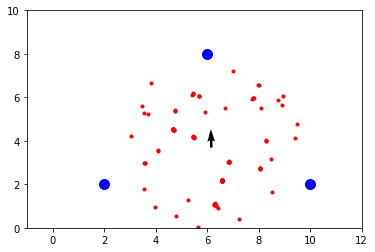

looped


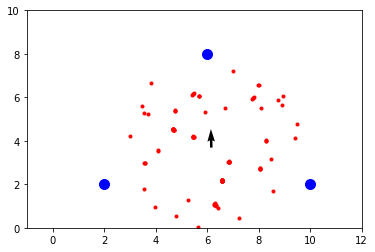

looped


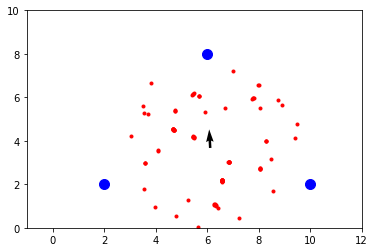

looped


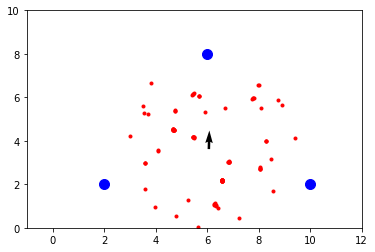

looped


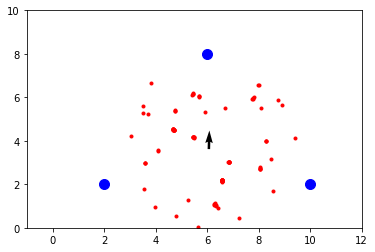

looped


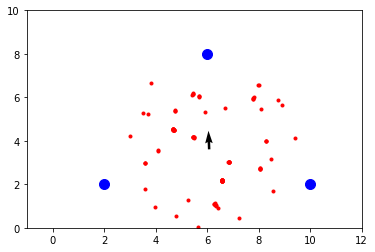

looped


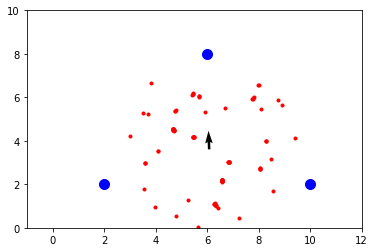

looped


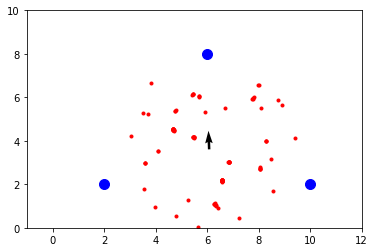

looped


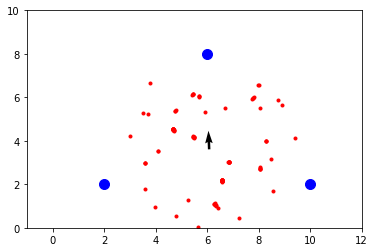

looped


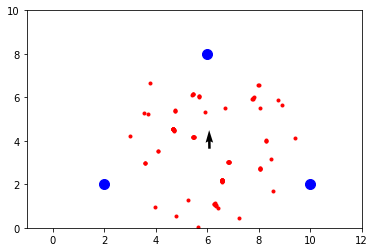

looped


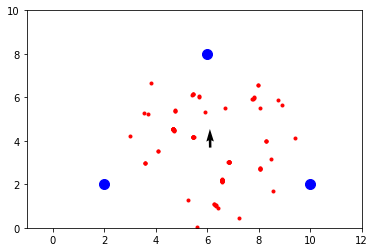

looped


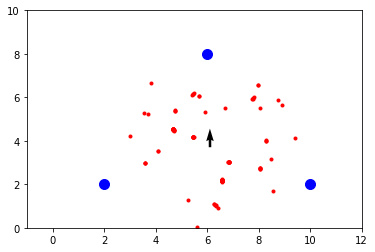

looped


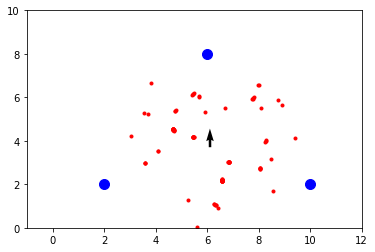

looped


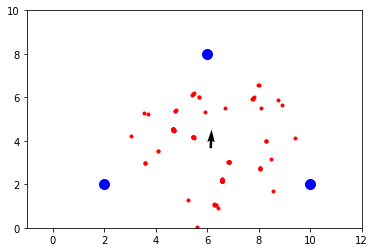

looped


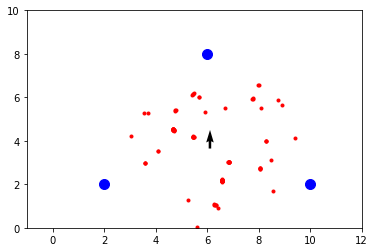

looped


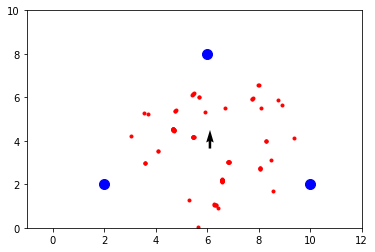

looped


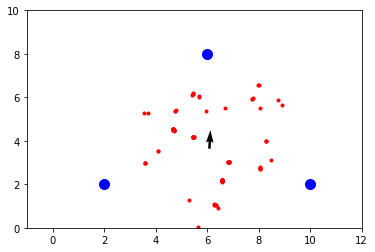

looped


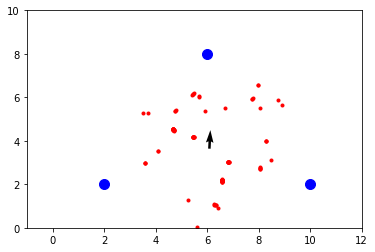

looped


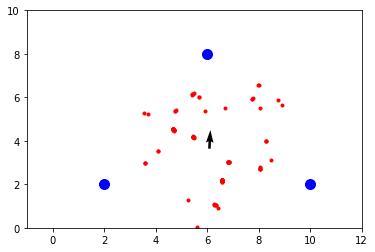

looped


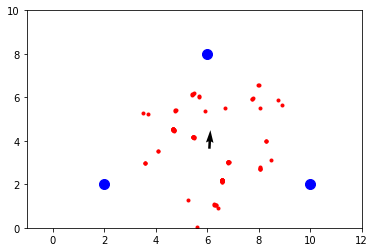

looped


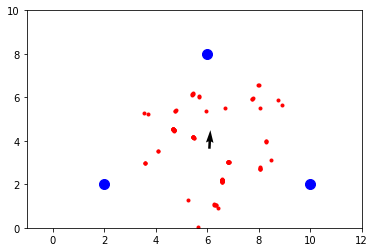

looped


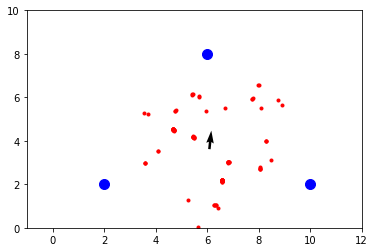

looped


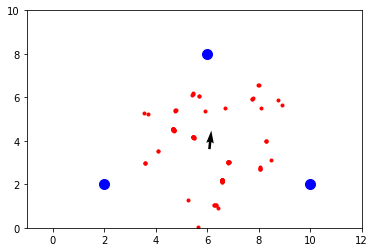

looped


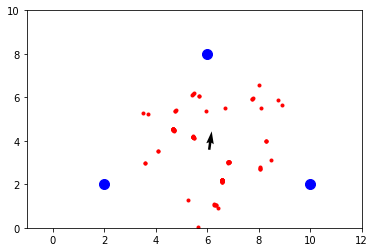

looped


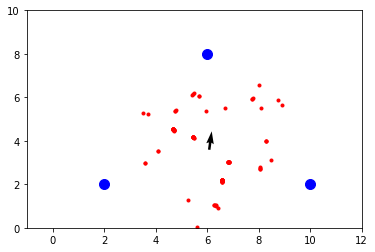

looped


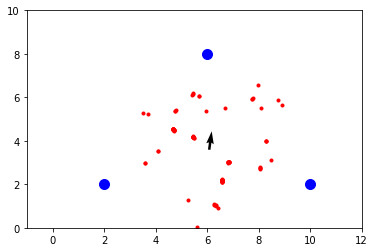

looped


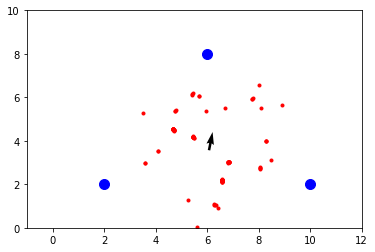

looped


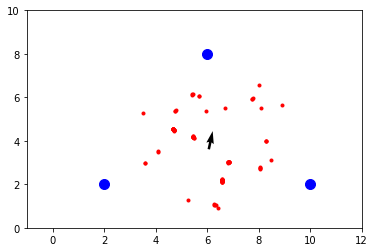

looped


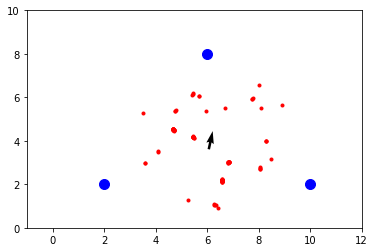

looped


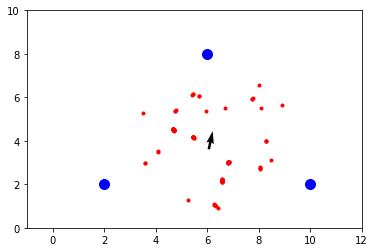

looped


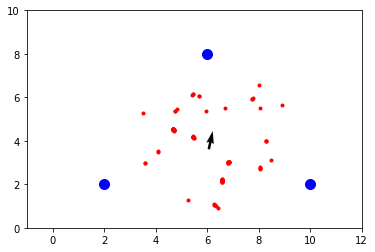

looped


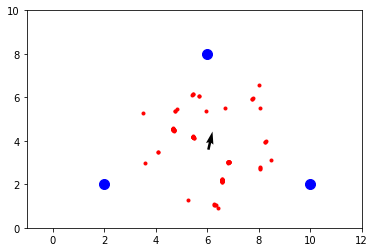

looped


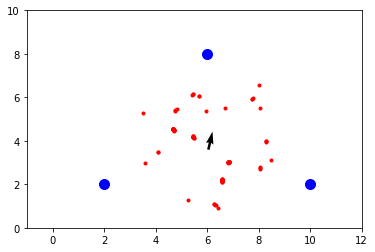

looped


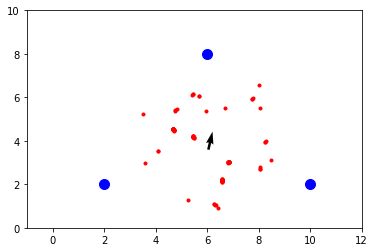

looped


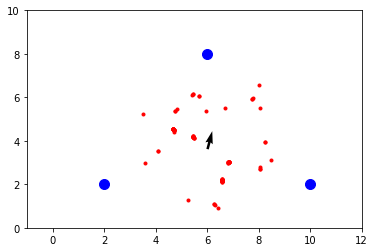

looped


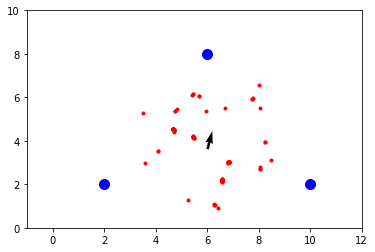

looped


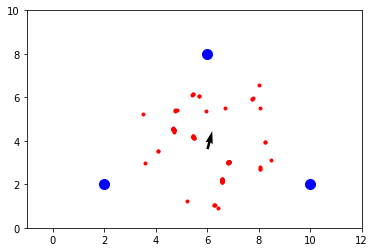

looped


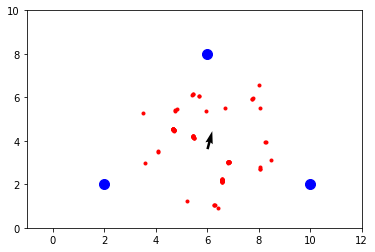

looped


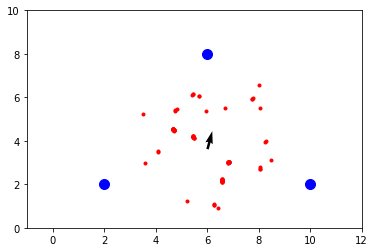

looped


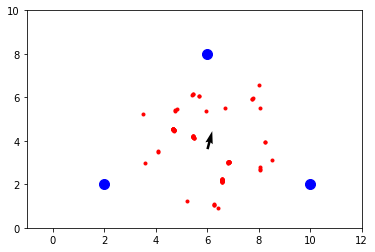

looped


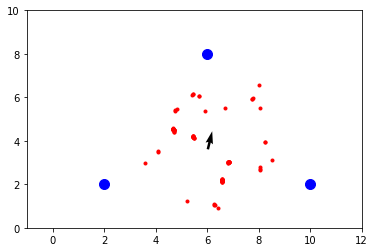

looped


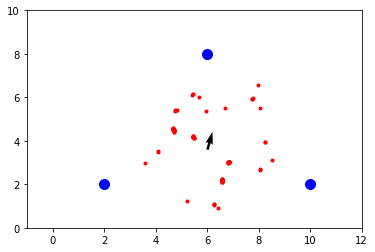

looped


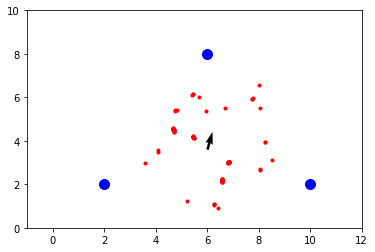

looped


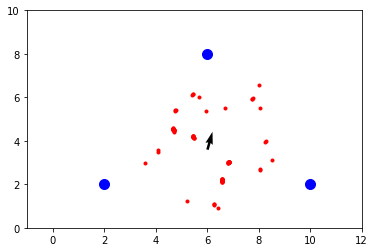

looped


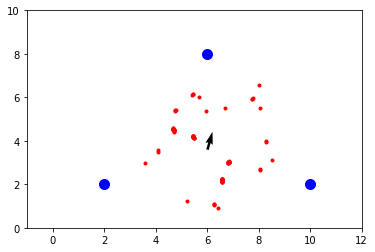

looped


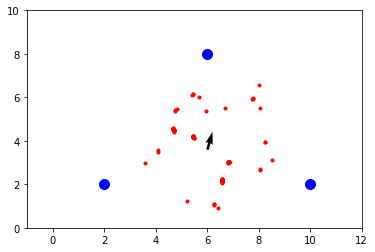

looped


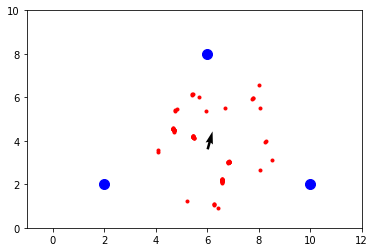

looped


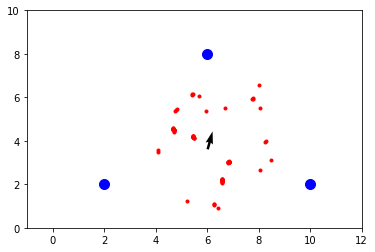

looped


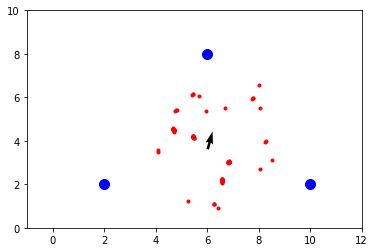

looped


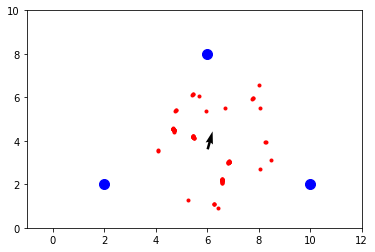

looped


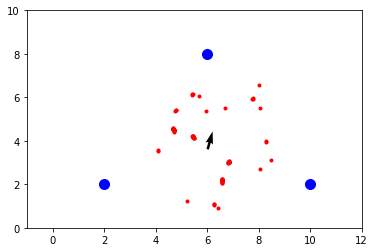

looped


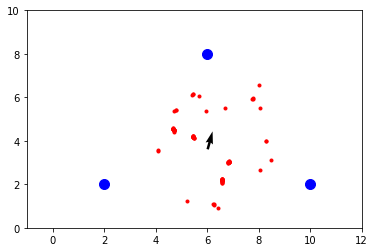

looped


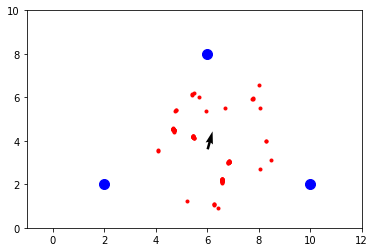

looped


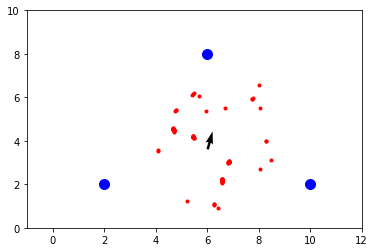

looped


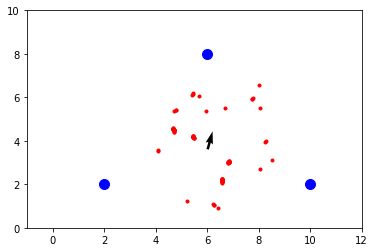

looped


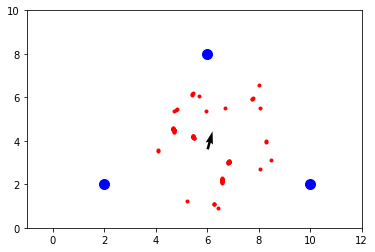

looped


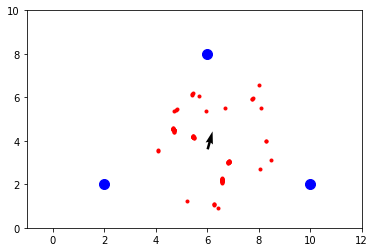

looped


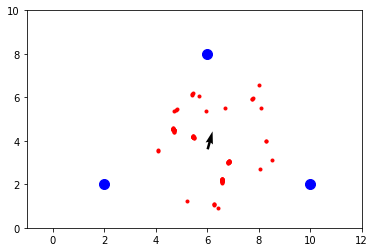

looped


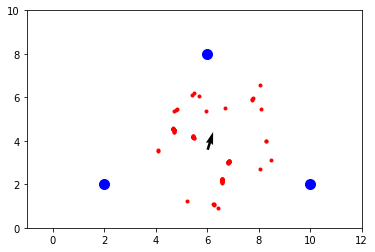

looped


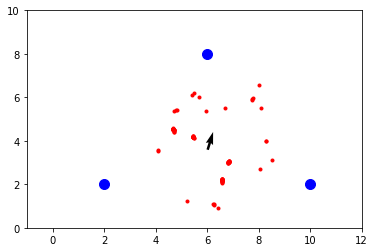

looped


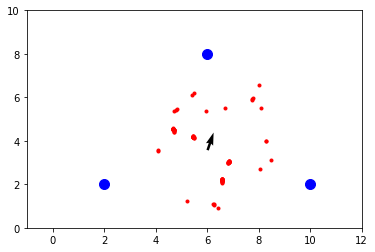

looped


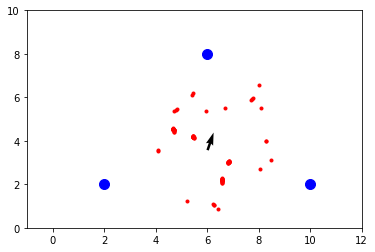

looped


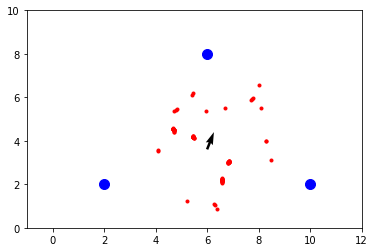

looped


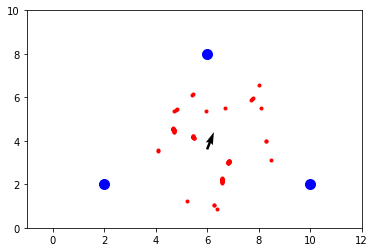

looped


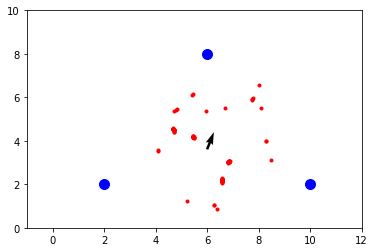

looped


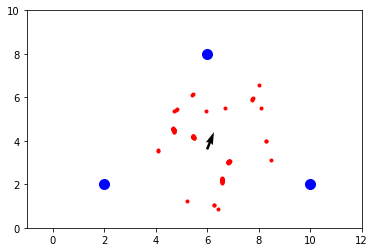

looped


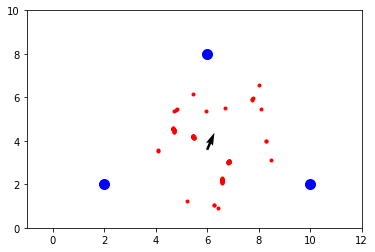

looped


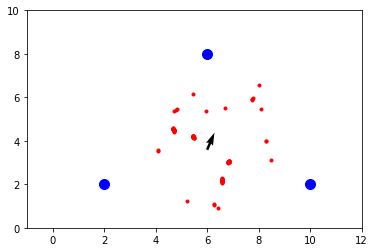

looped


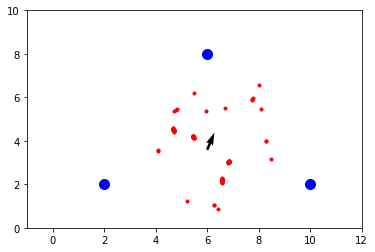

looped


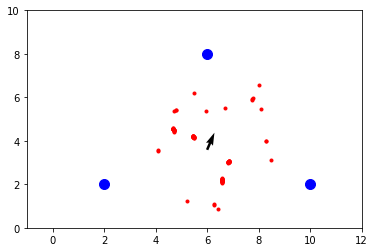

looped


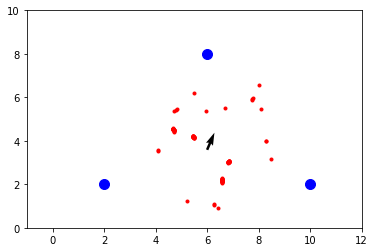

looped


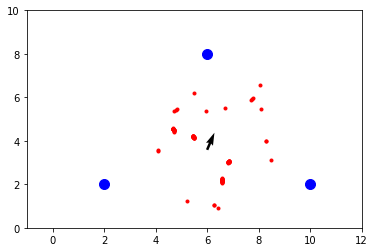

looped


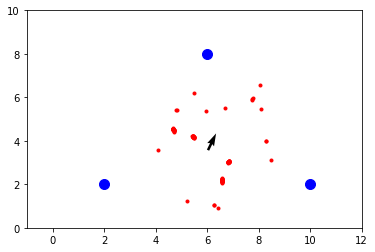

looped


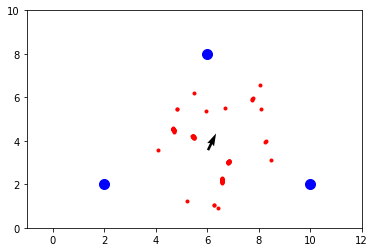

looped


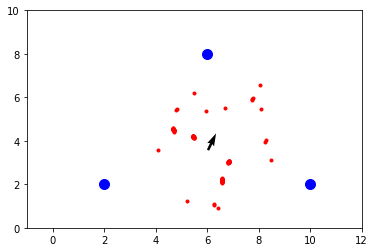

looped


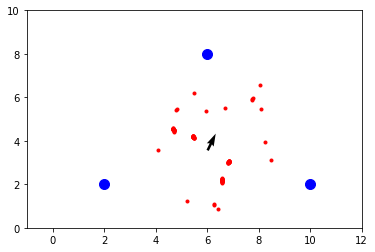

looped


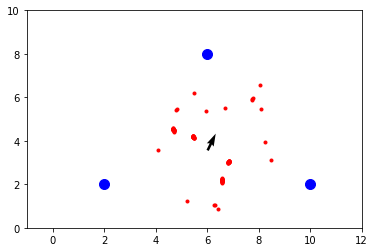

looped


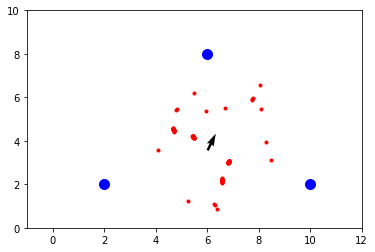

looped


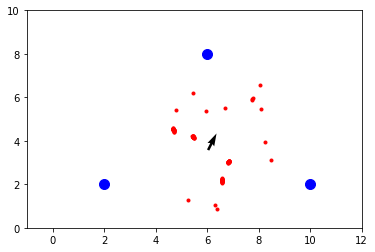

looped


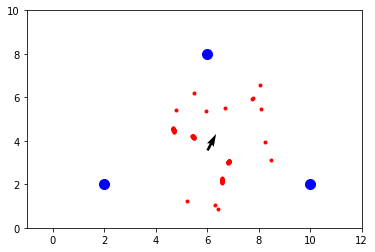

looped


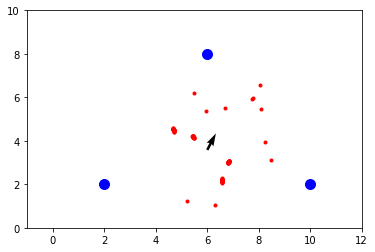

looped


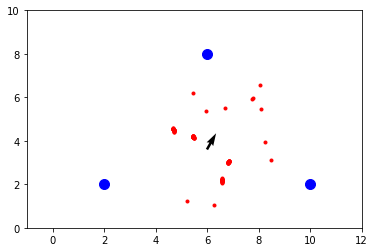

looped


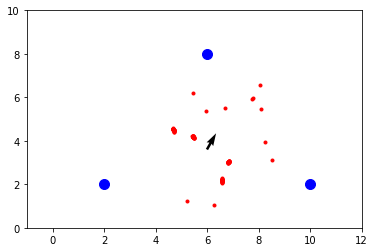

looped


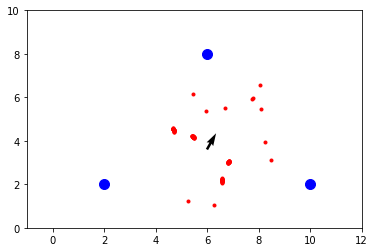

looped


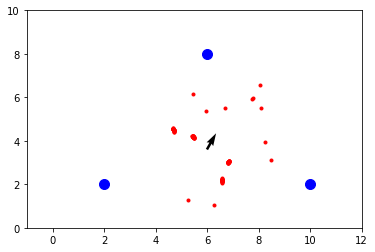

looped


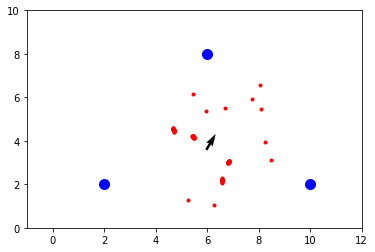

looped


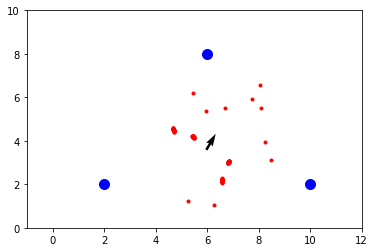

looped


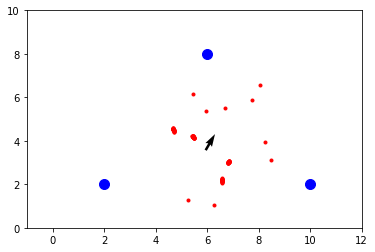

looped


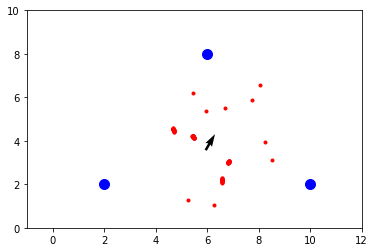

looped


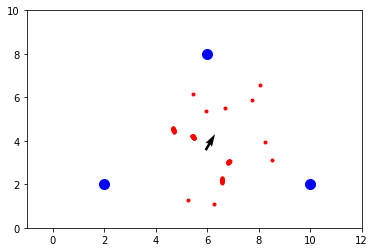

looped


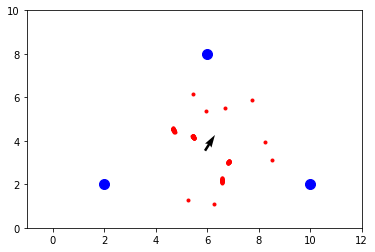

looped


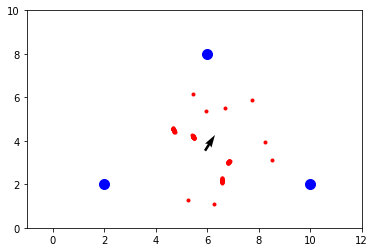

looped


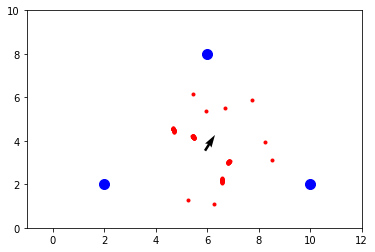

looped


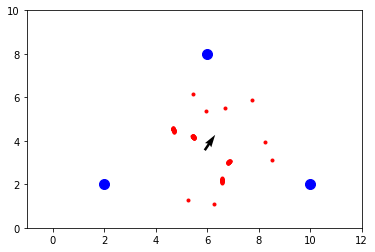

looped


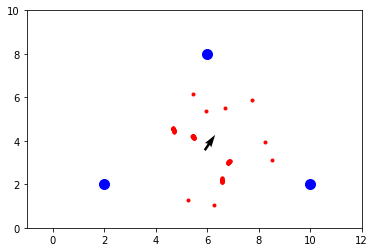

looped


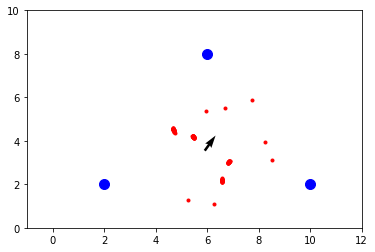

looped


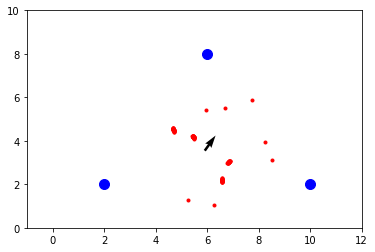

looped


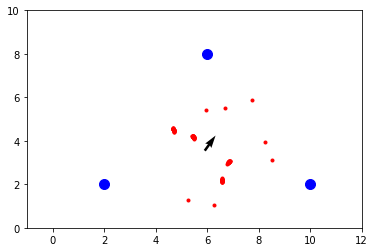

looped


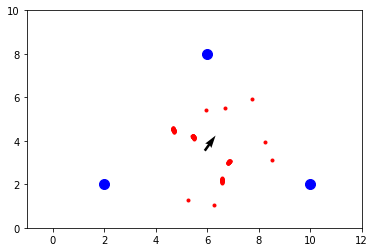

looped


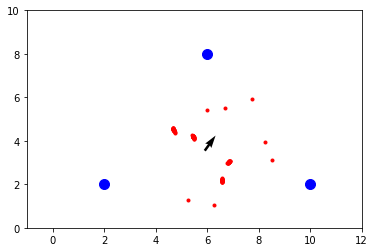

looped


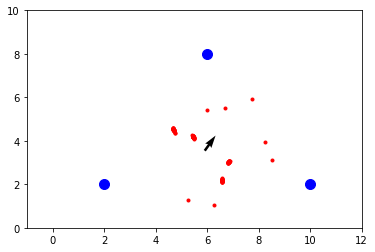

looped


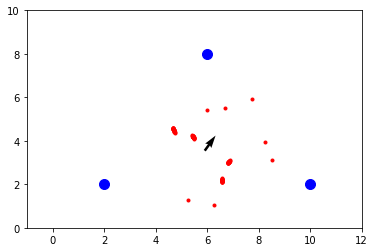

looped


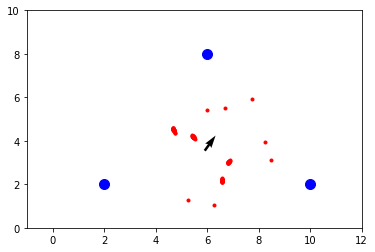

looped


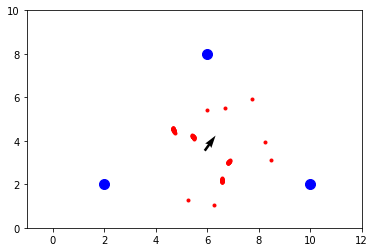

looped


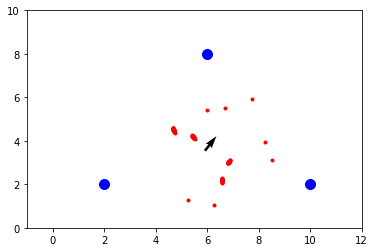

looped


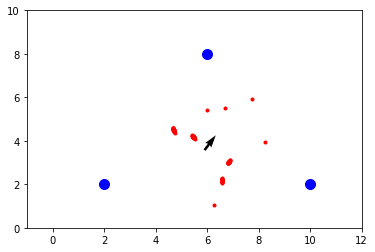

looped


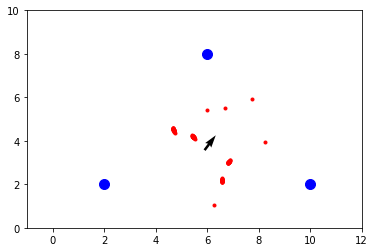

looped


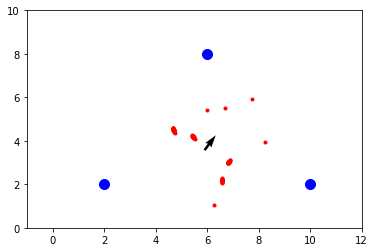

looped


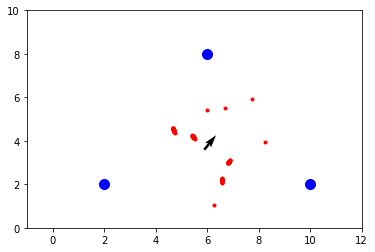

looped


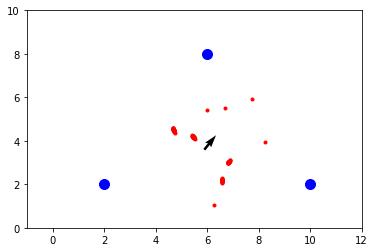

looped


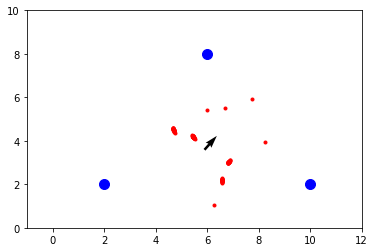

looped


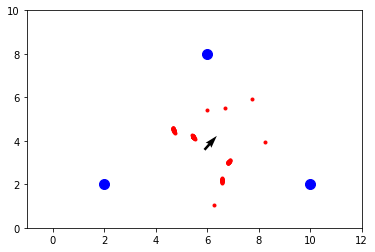

looped


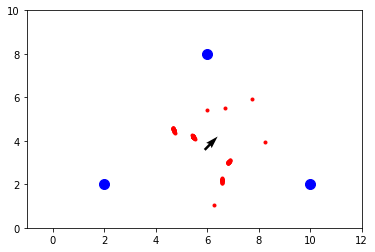

looped


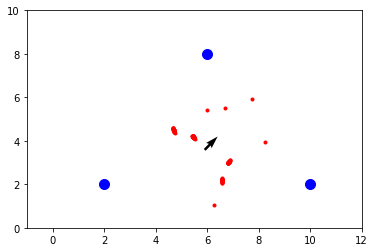

looped


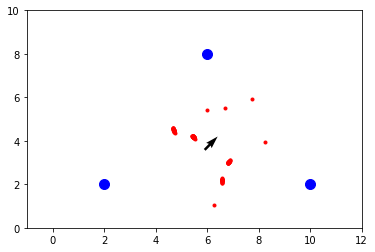

looped


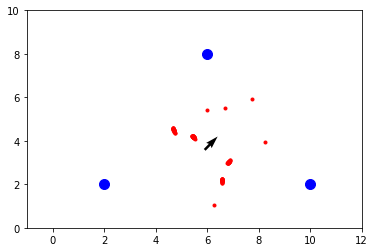

looped


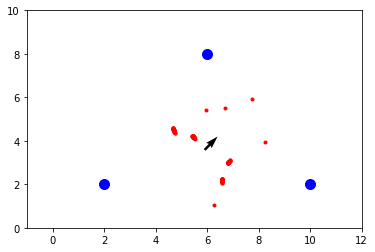

looped


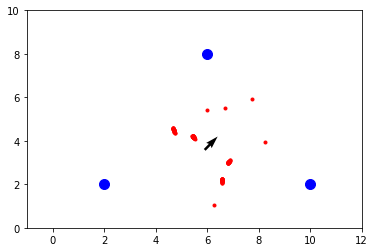

looped


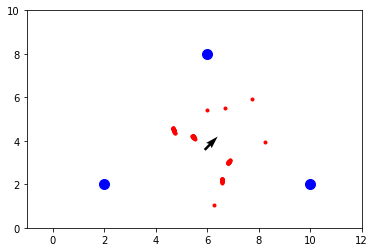

looped


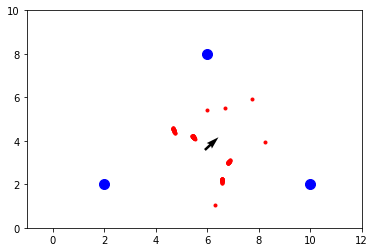

looped


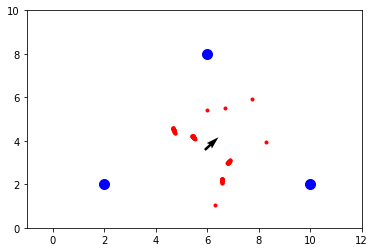

looped


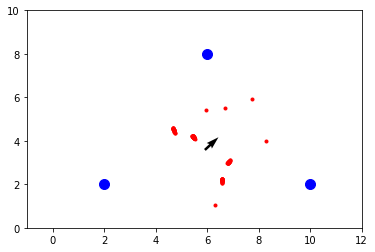

looped


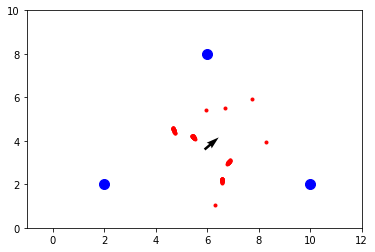

looped


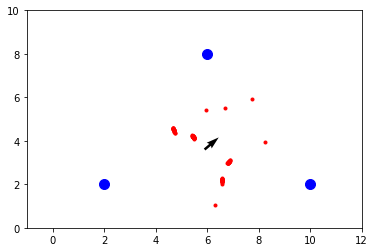

looped


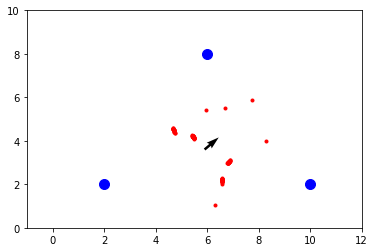

looped


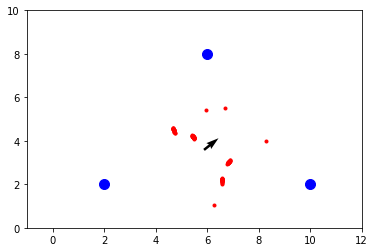

looped


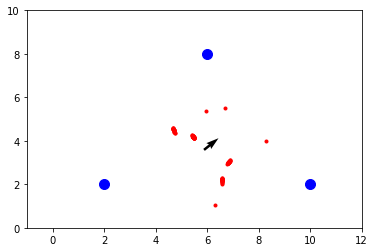

looped


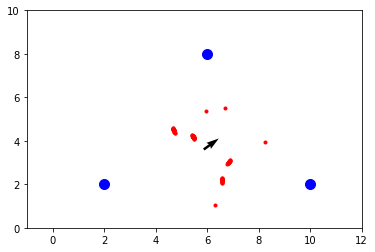

looped


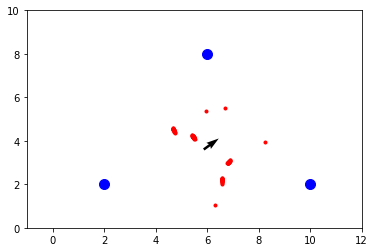

looped


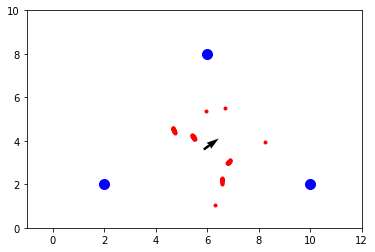

looped


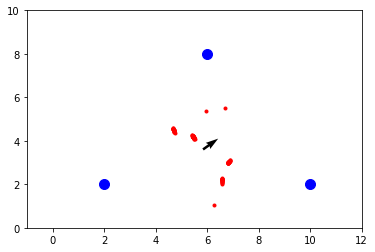

looped


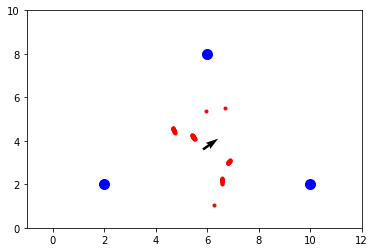

looped


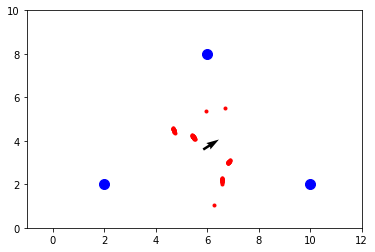

looped


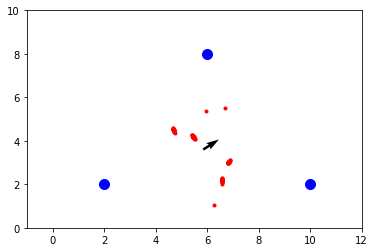

looped


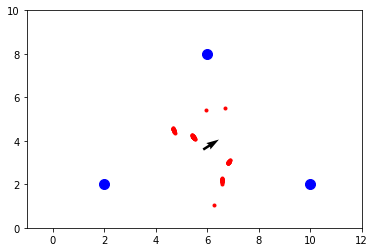

looped


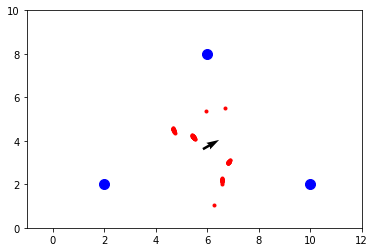

looped


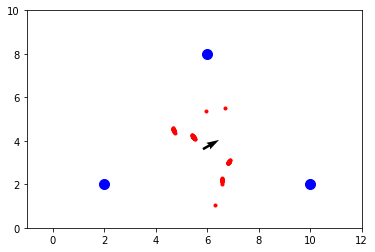

looped


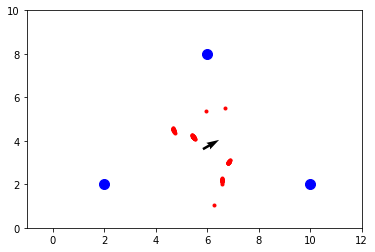

looped


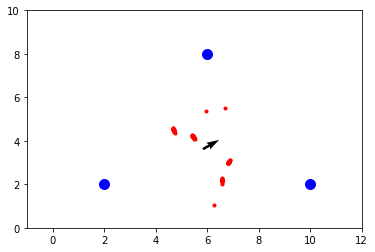

looped


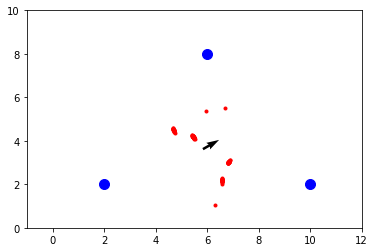

looped


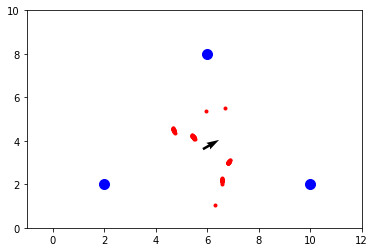

looped


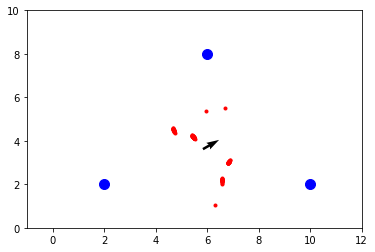

looped


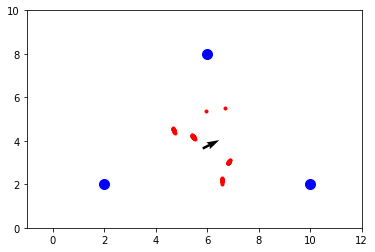

looped


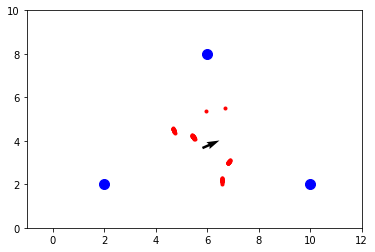

looped


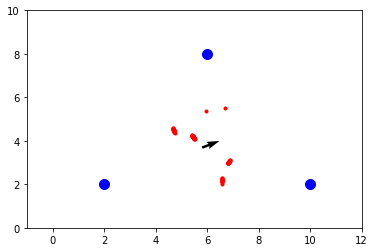

looped


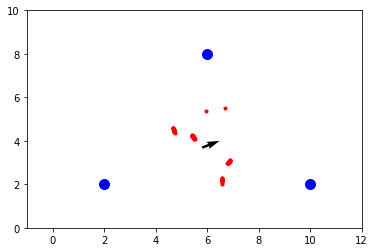

looped


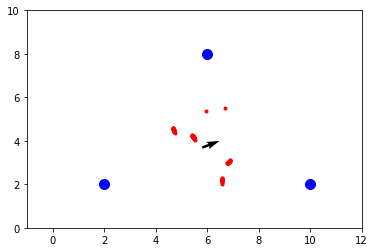

looped


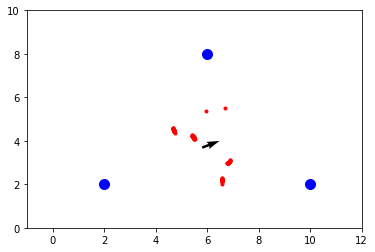

looped


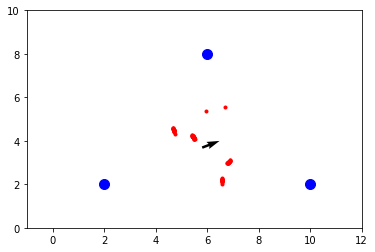

looped


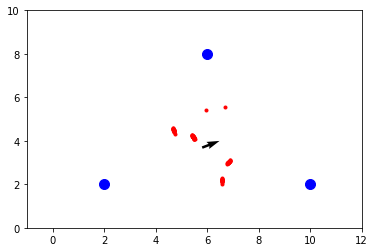

looped


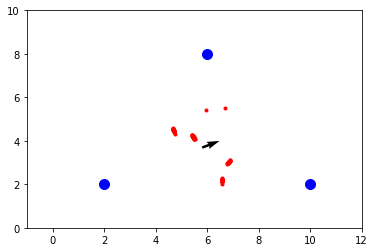

looped


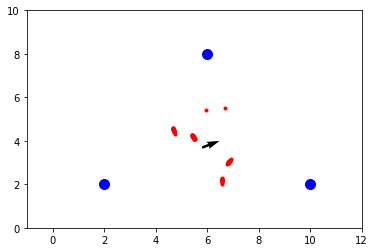

looped


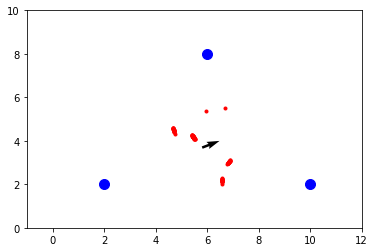

looped


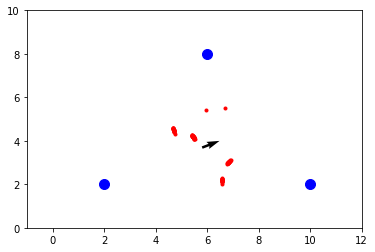

looped


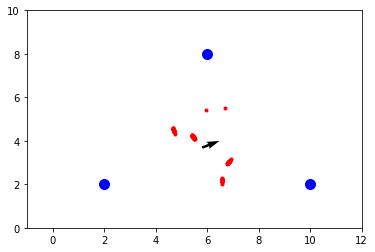

looped


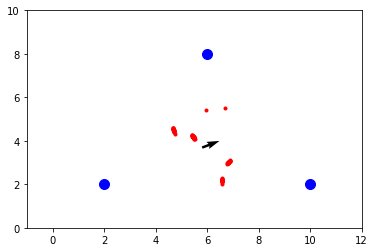

looped


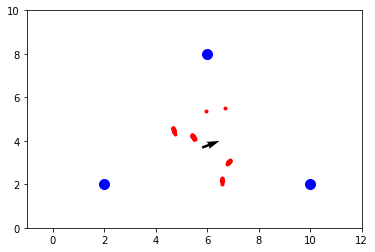

looped


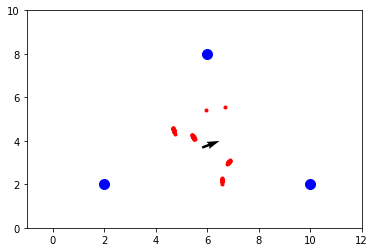

looped


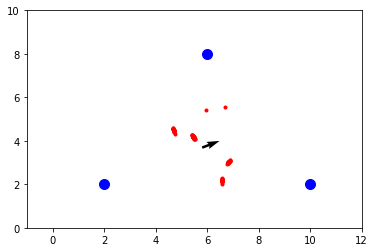

looped


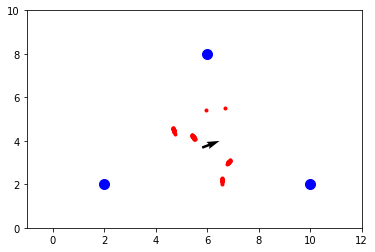

looped


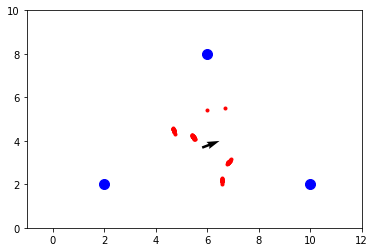

looped


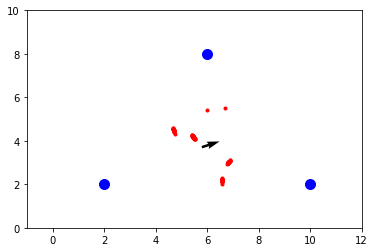

looped


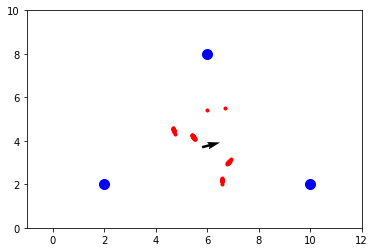

looped


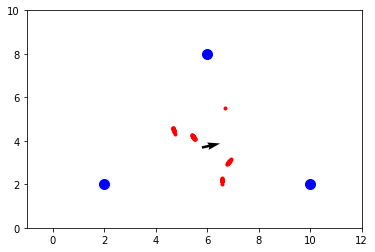

looped


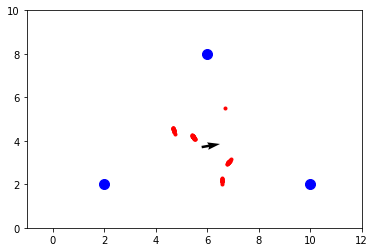

looped


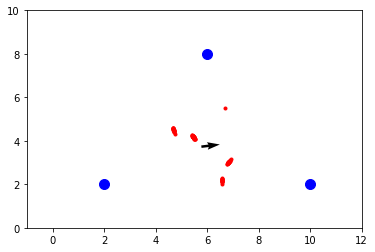

looped


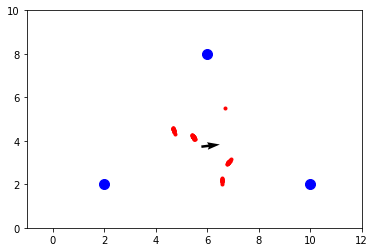

looped


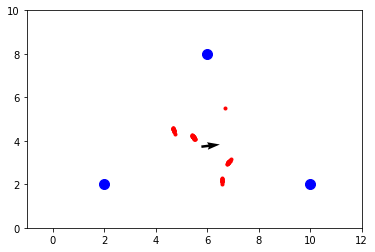

looped


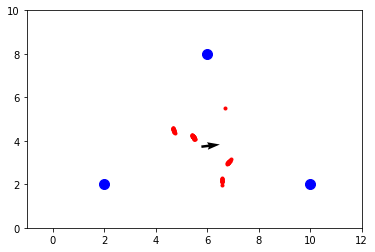

looped


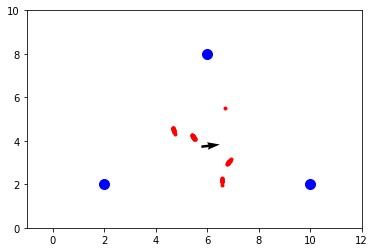

looped


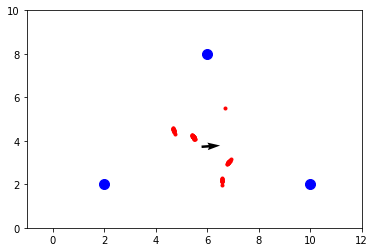

looped


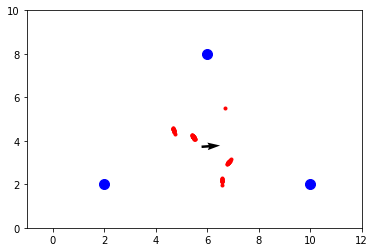

looped


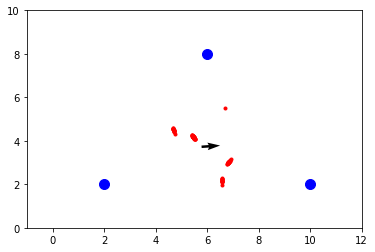

looped


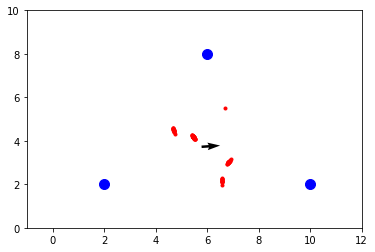

looped


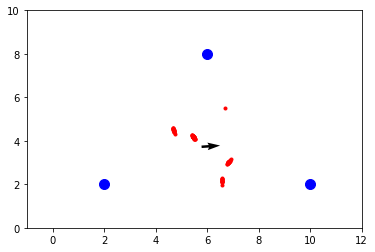

looped


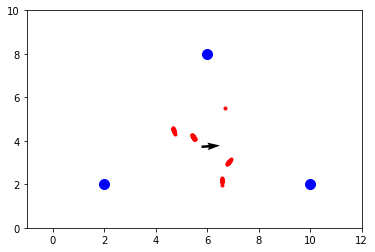

looped


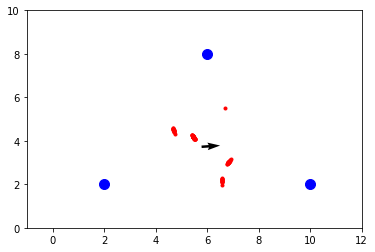

looped


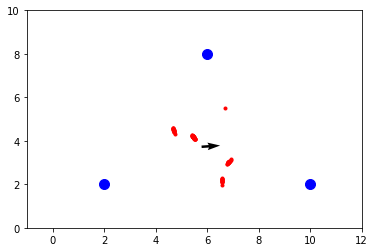

looped


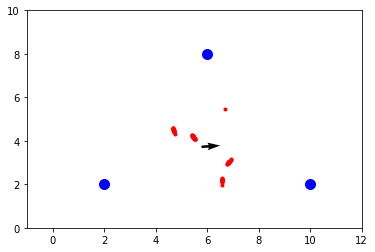

looped


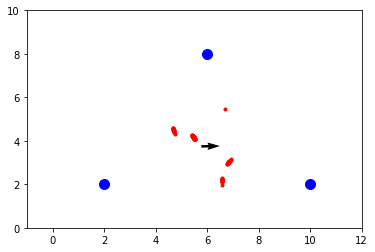

looped


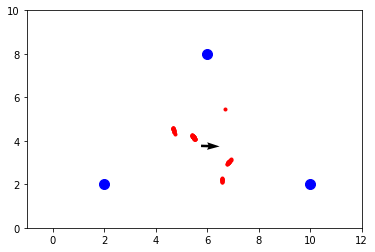

looped


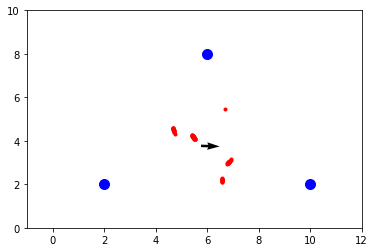

looped


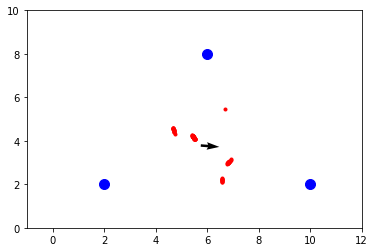

looped


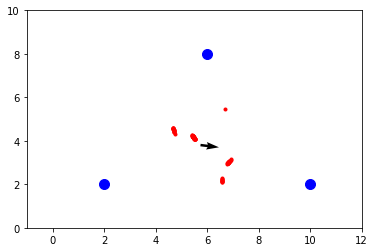

looped


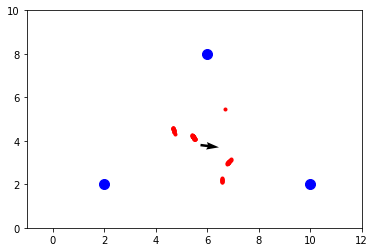

looped


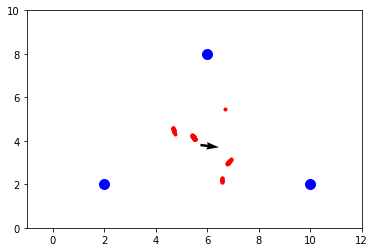

looped


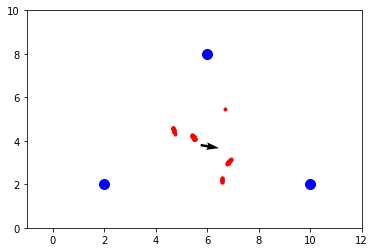

looped


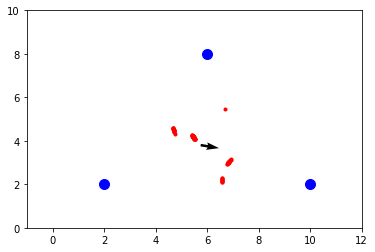

looped


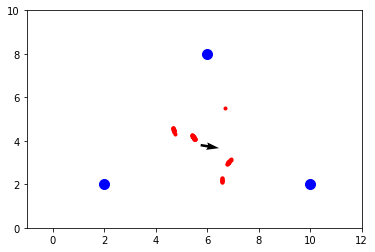

looped


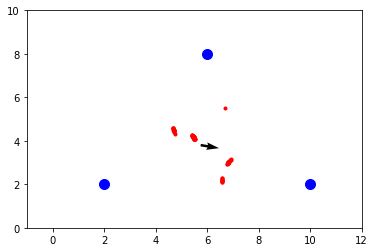

looped


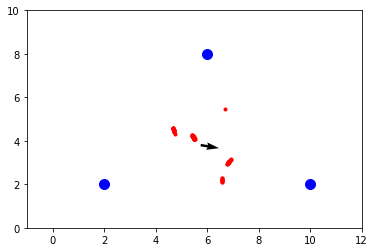

looped


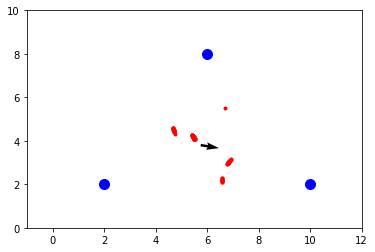

looped


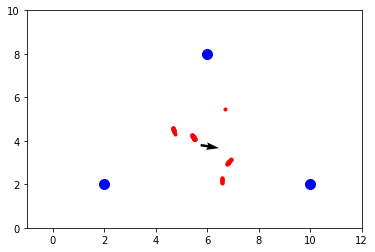

looped


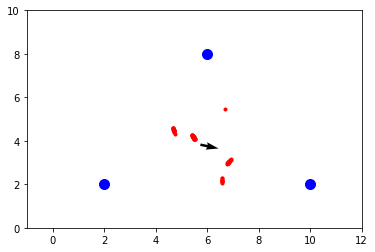

looped


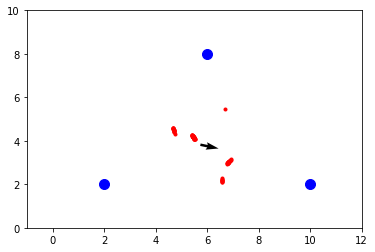

looped


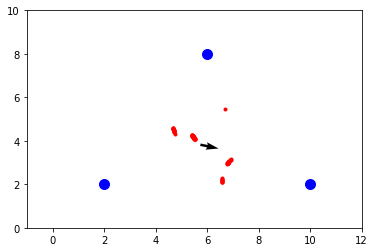

looped


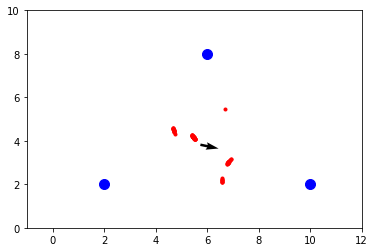

looped


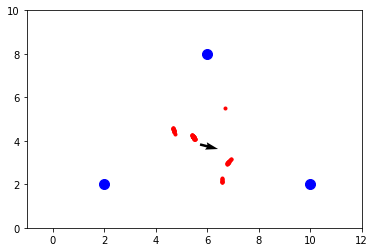

looped


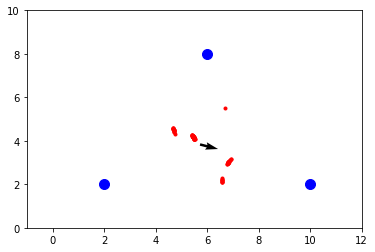

looped


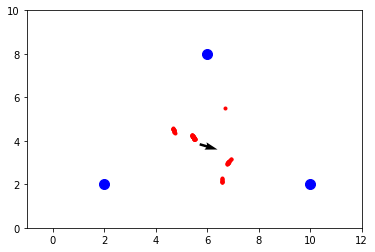

looped


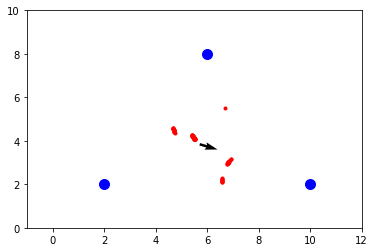

looped


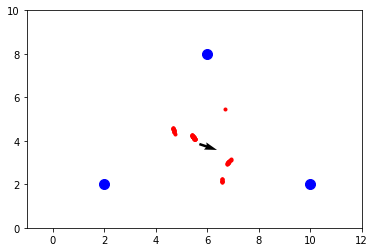

looped


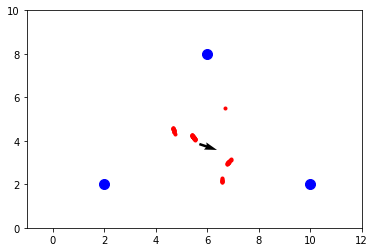

looped


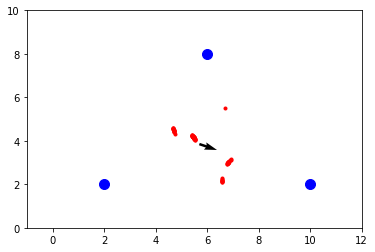

looped


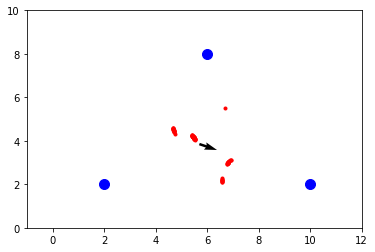

looped


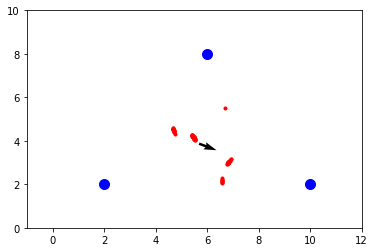

looped


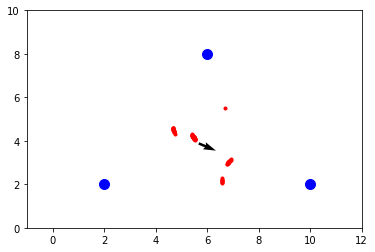

looped


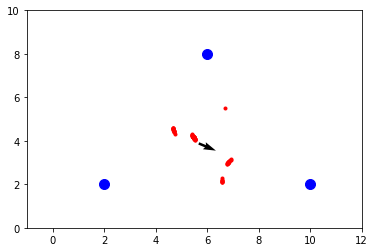

looped


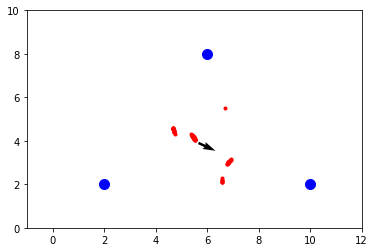

looped


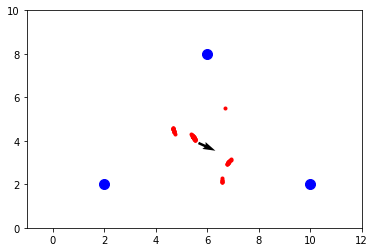

looped


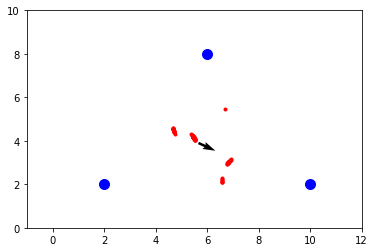

looped


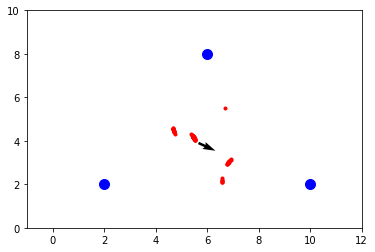

looped


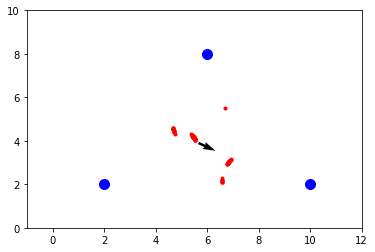

looped


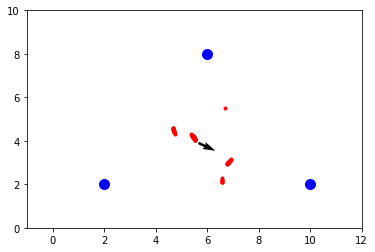

looped


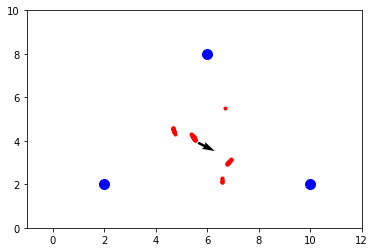

looped


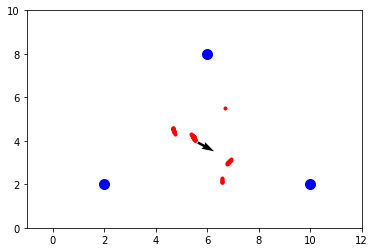

looped


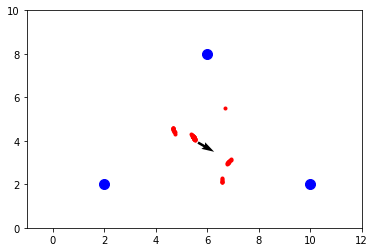

looped


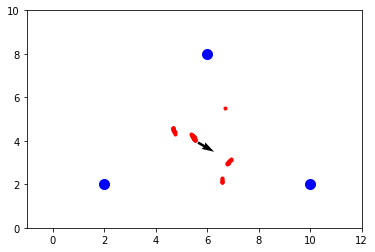

looped


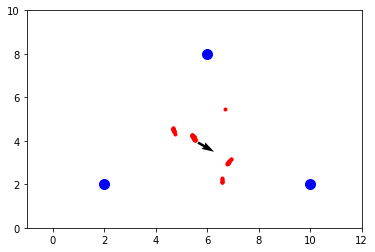

looped


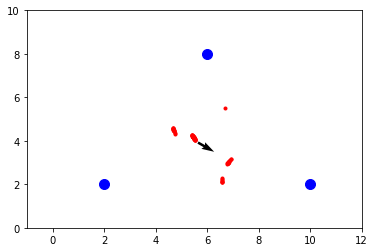

looped


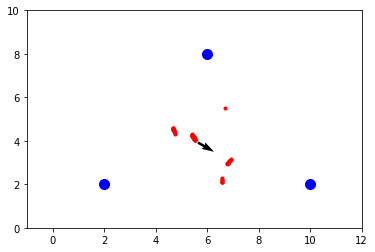

looped


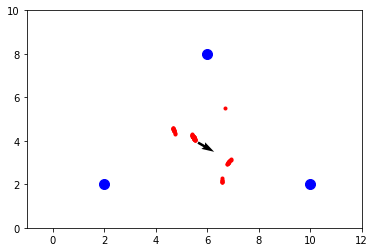

looped


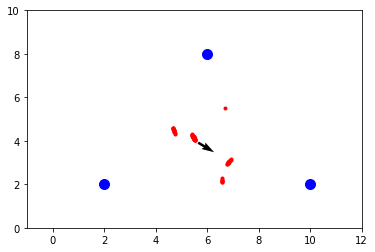

looped


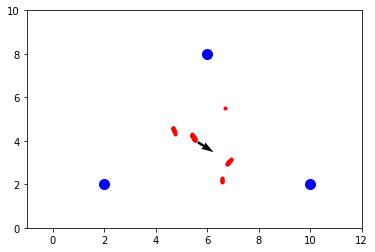

looped


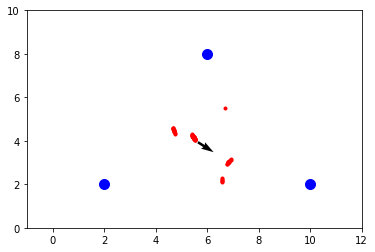

looped


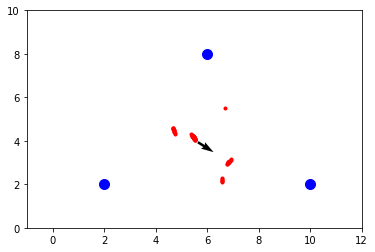

looped


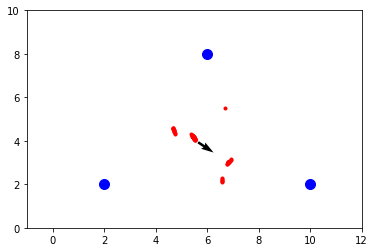

looped


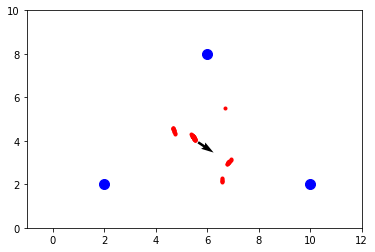

looped


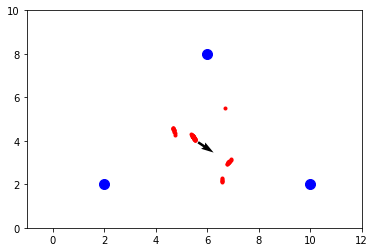

looped


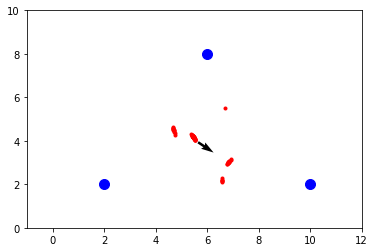

looped


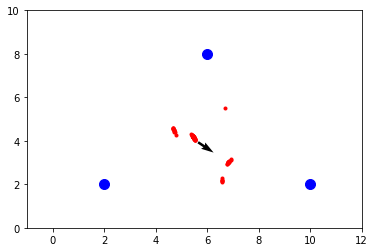

looped


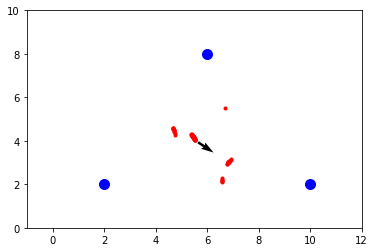

looped


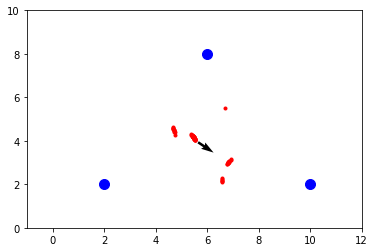

looped


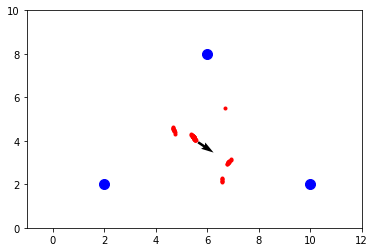

looped


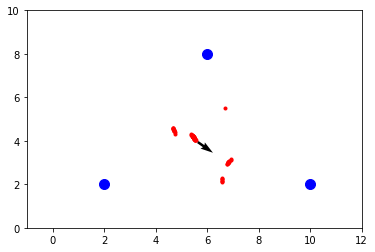

looped


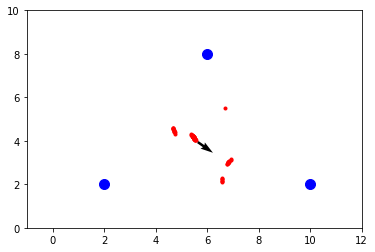

looped


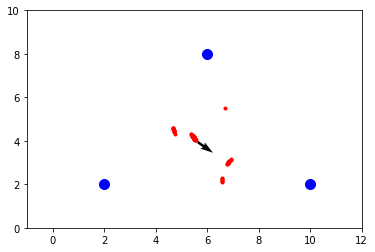

looped


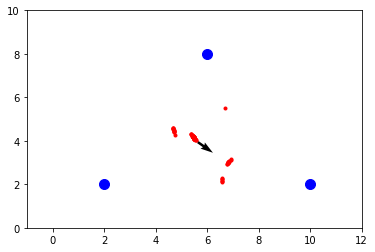

looped


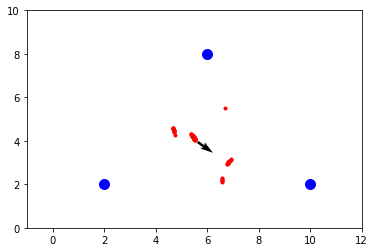

looped


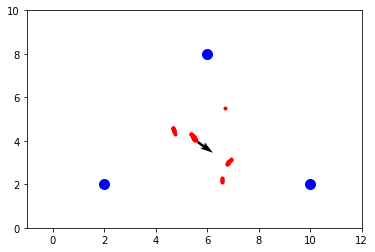

looped


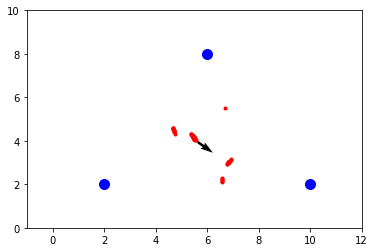

looped


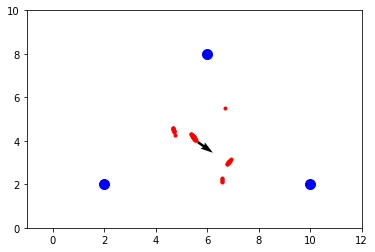

looped


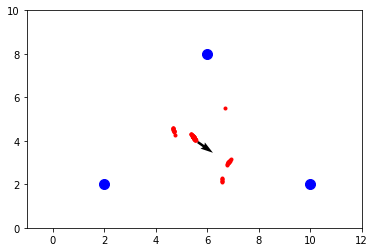

looped


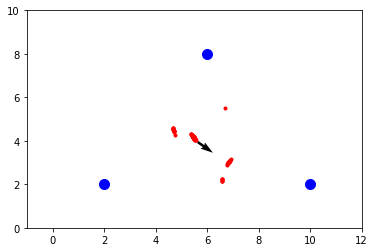

looped


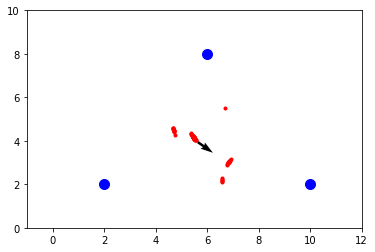

looped


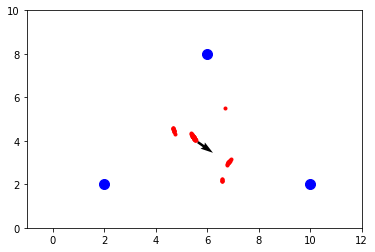

looped


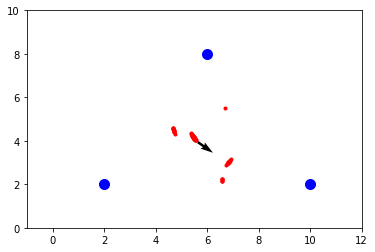

looped


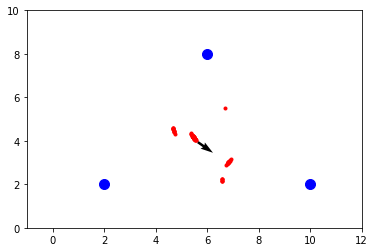

looped


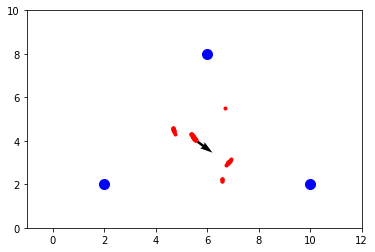

looped


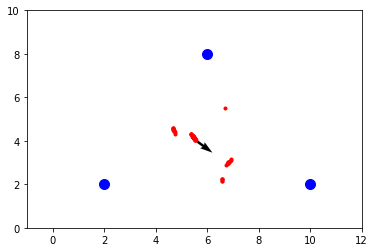

looped


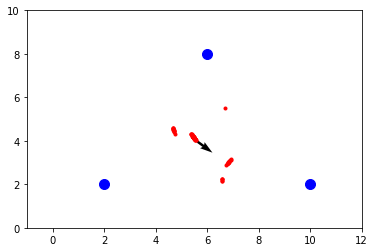

looped


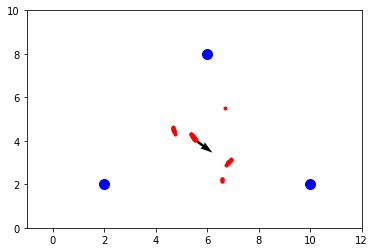

looped


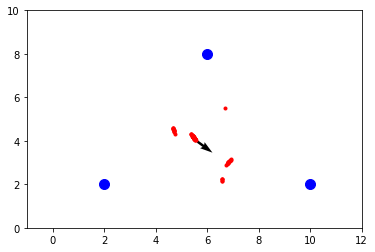

looped


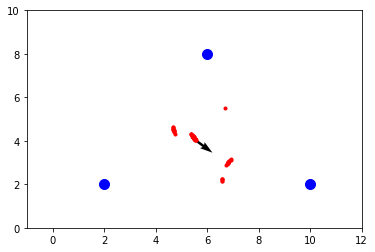

looped


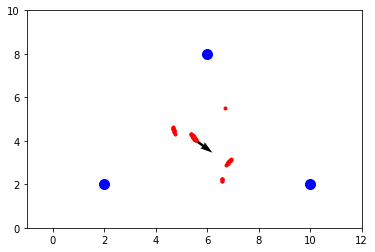

looped


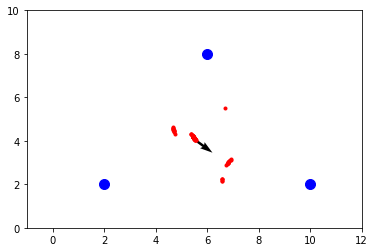

looped


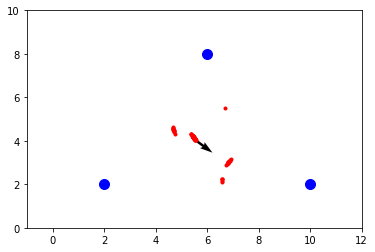

looped


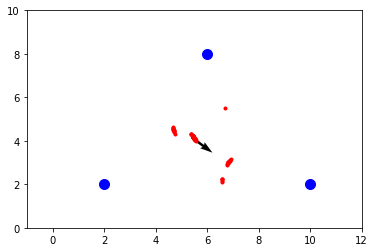

looped


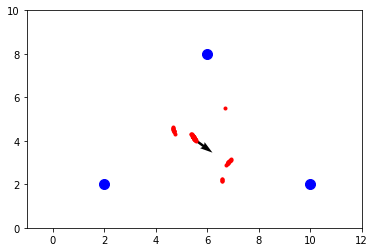

looped


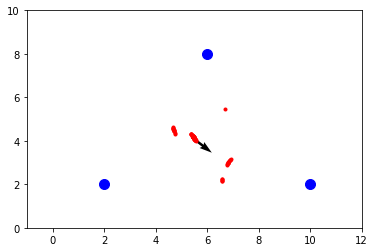

looped


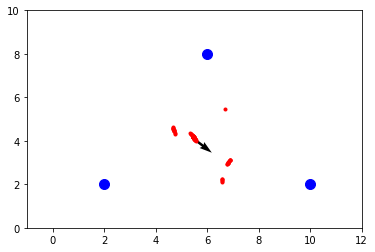

looped


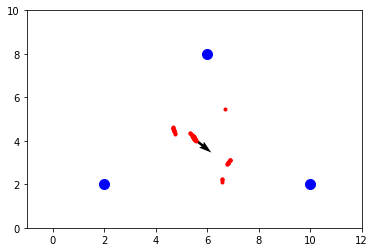

looped


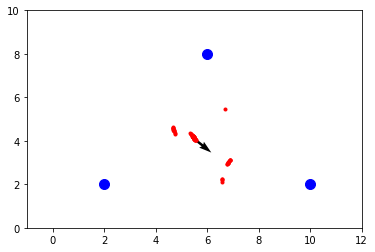

looped


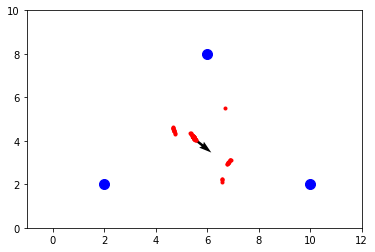

looped


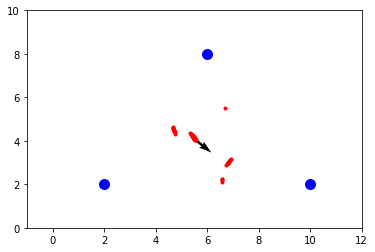

looped


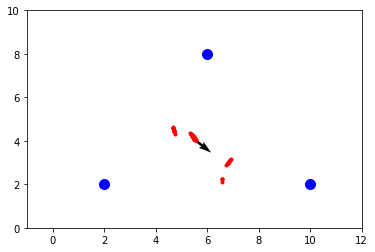

looped


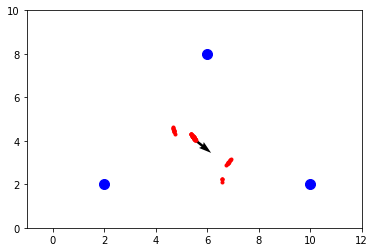

looped


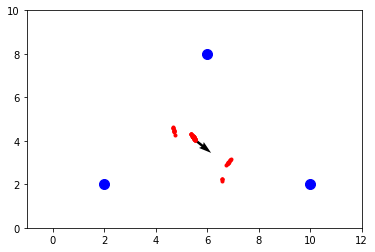

looped


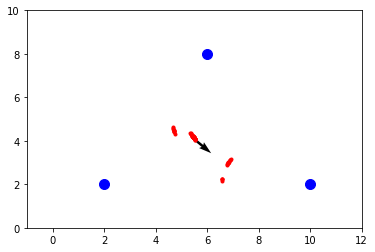

looped


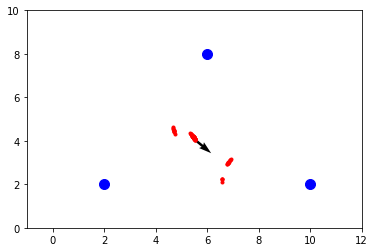

looped


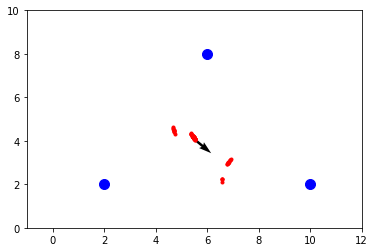

looped


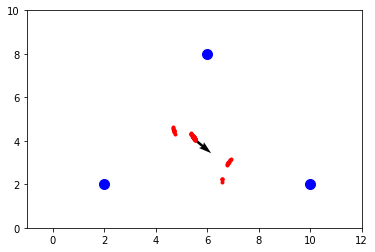

looped


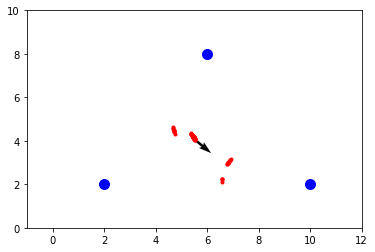

looped


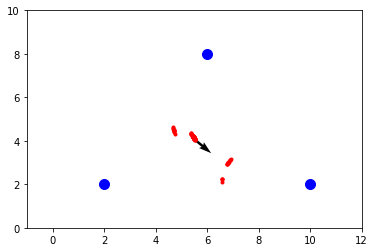

looped


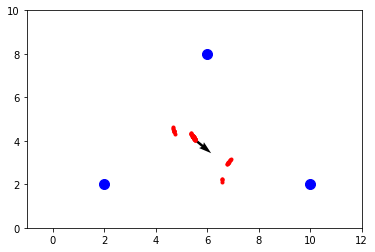

looped


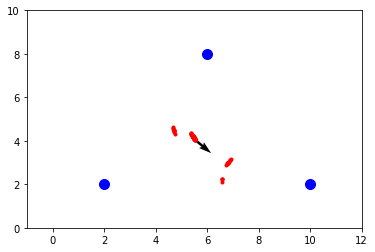

looped


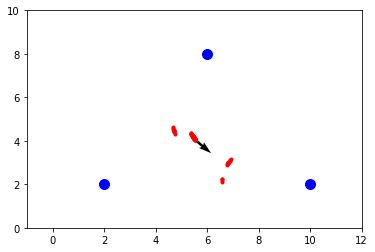

looped


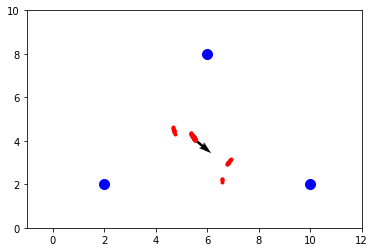

looped


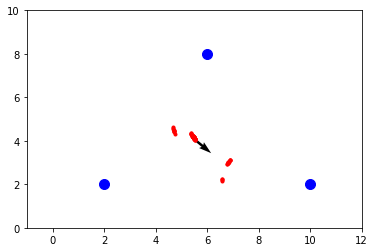

looped


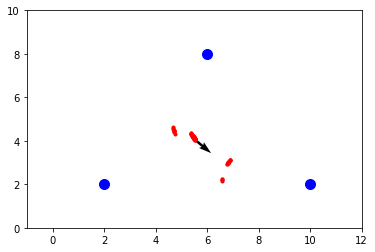

looped


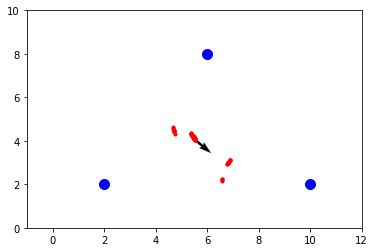

looped


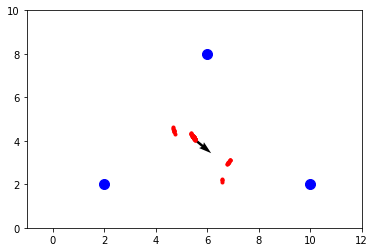

looped


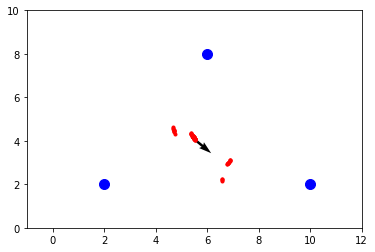

looped


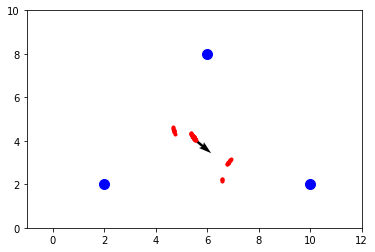

looped


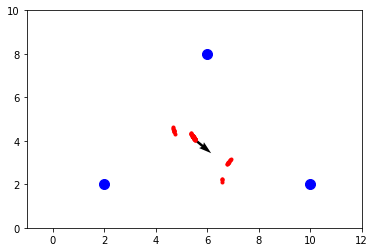

looped


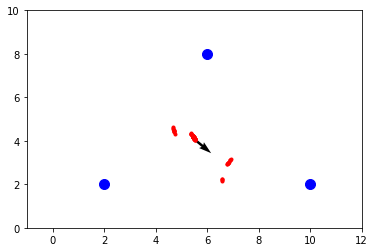

looped


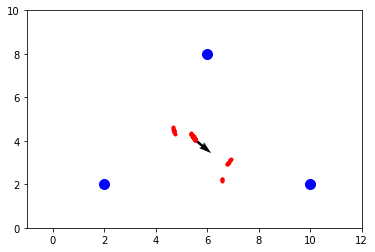

looped


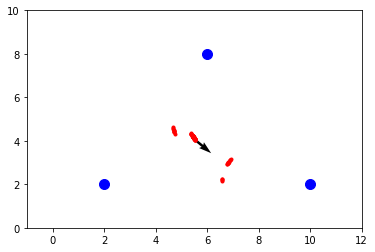

looped


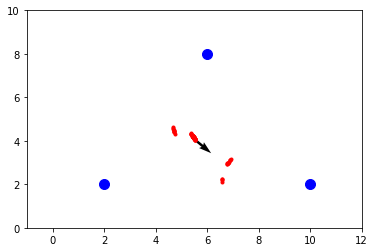

looped


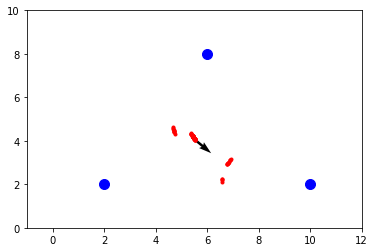

looped


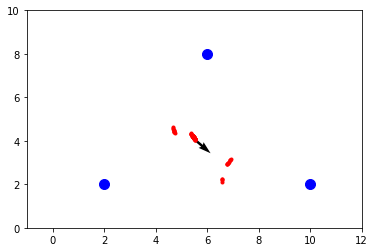

looped


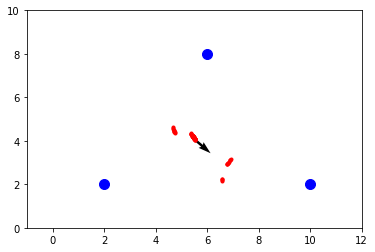

looped


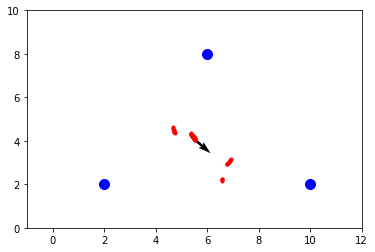

looped


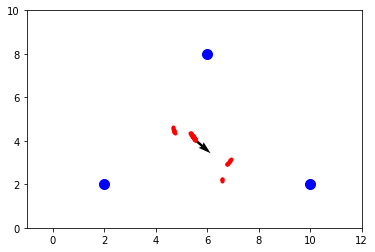

looped


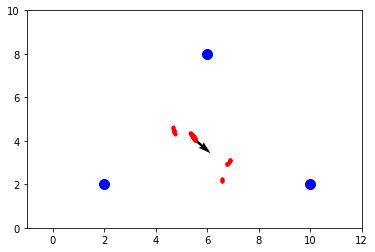

looped


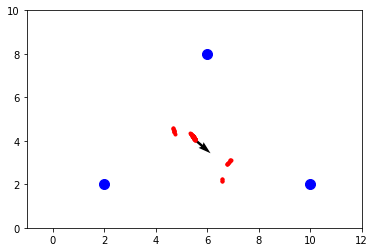

looped


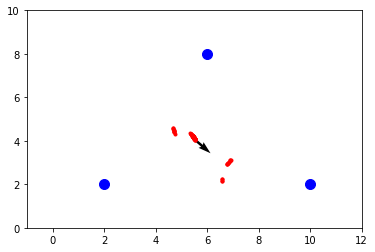

looped


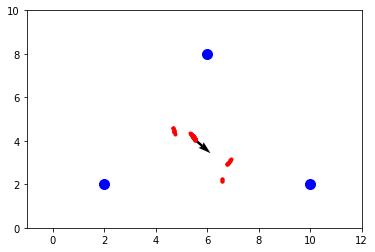

looped


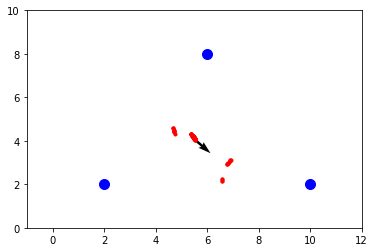

looped


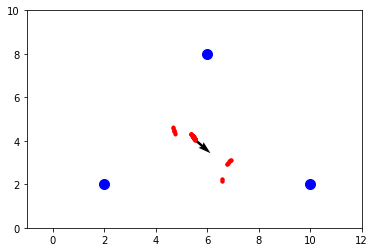

looped


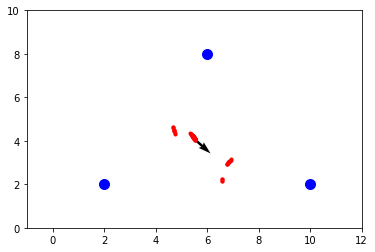

looped


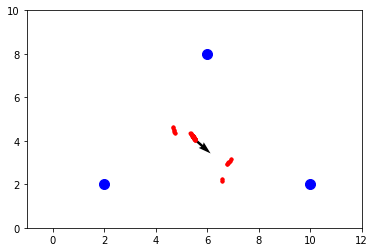

looped


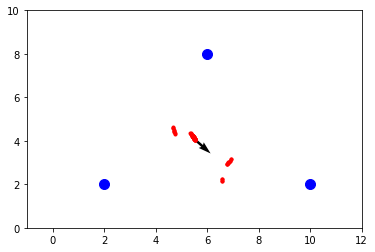

looped


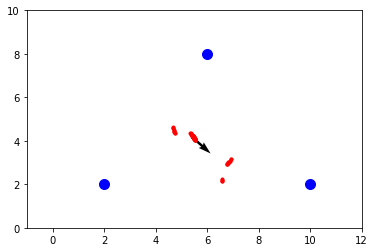

looped


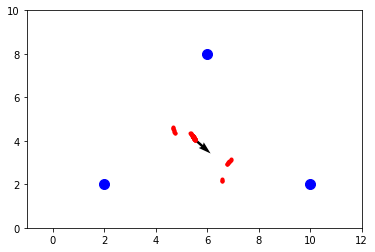

looped


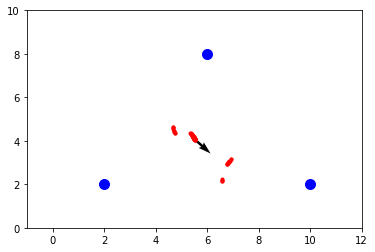

looped


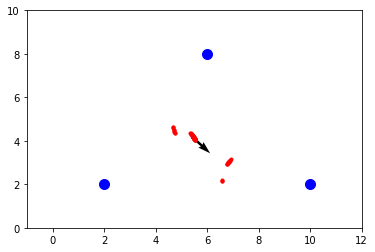

looped


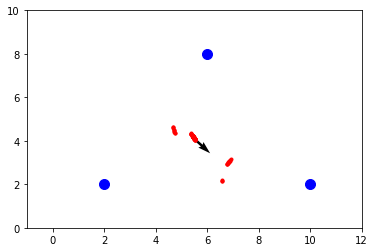

looped


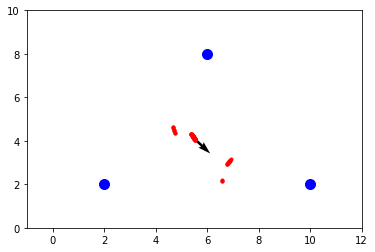

looped


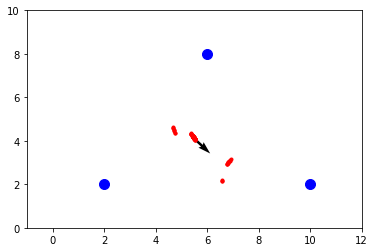

looped


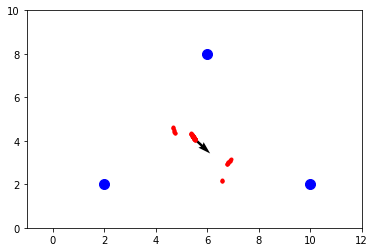

looped


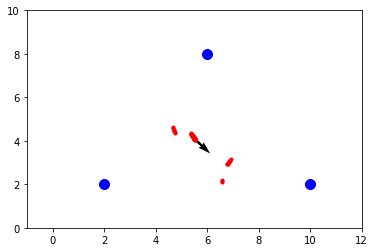

looped


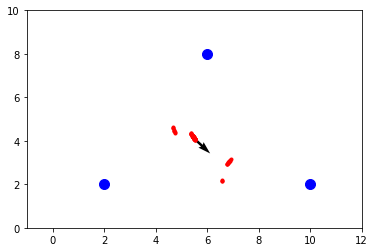

looped


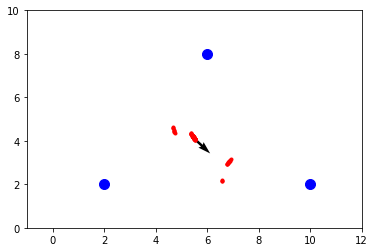

looped


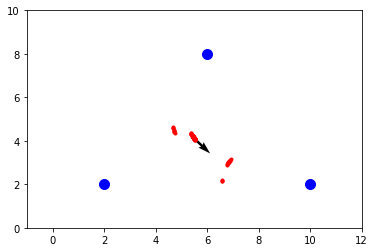

looped


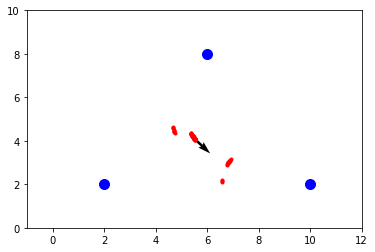

looped


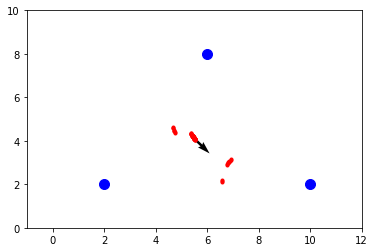

looped


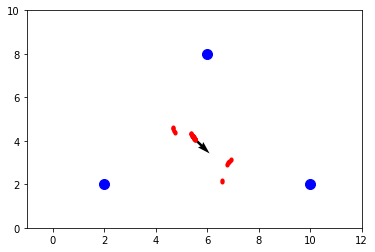

looped


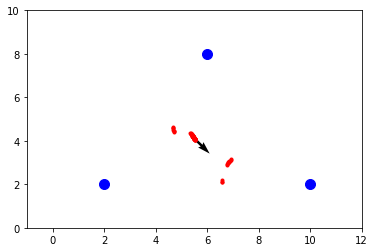

looped


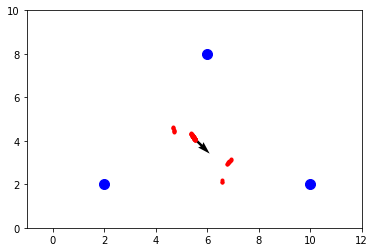

looped


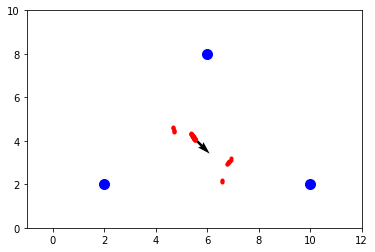

looped


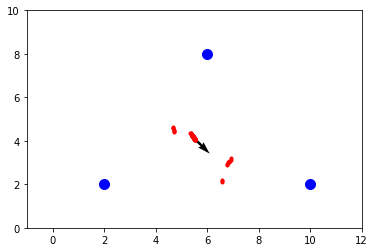

looped


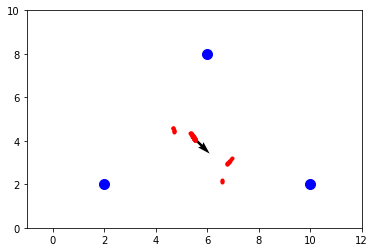

looped


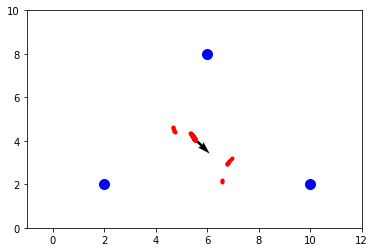

looped


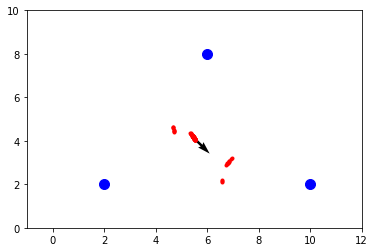

looped


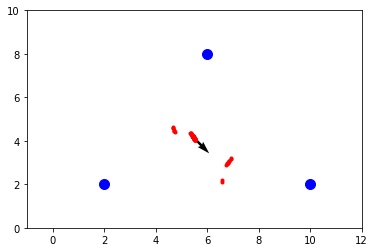

looped


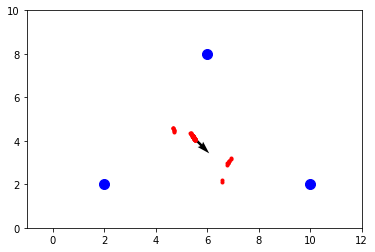

looped


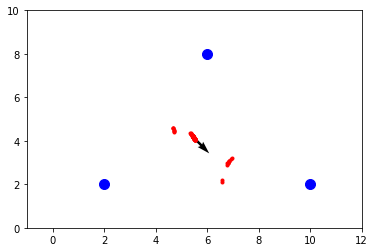

looped


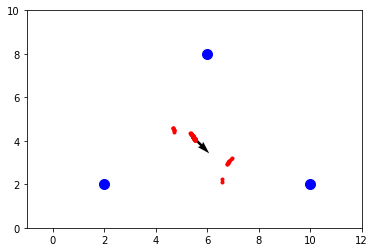

looped


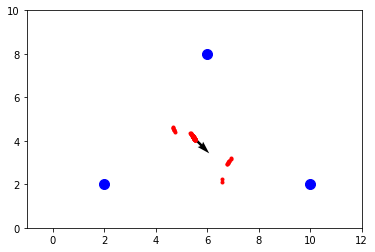

looped


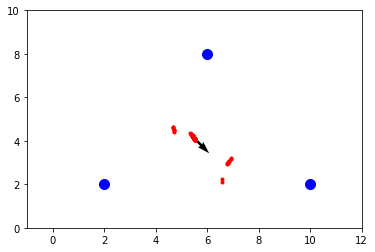

looped


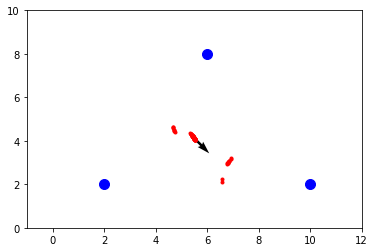

looped


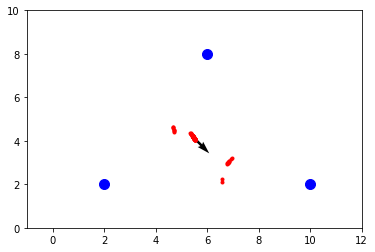

looped


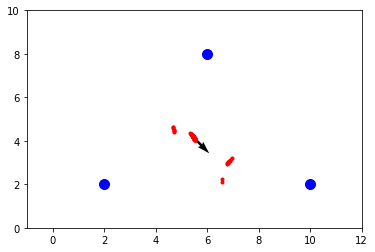

looped


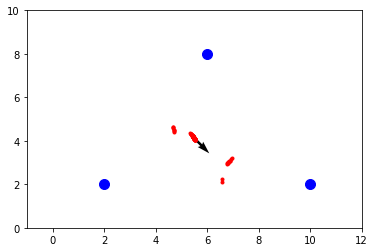

looped


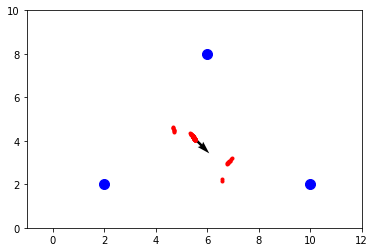

looped


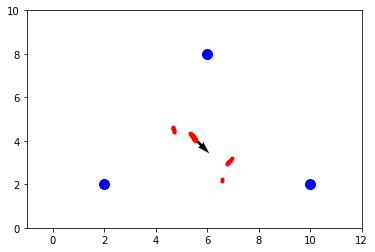

looped


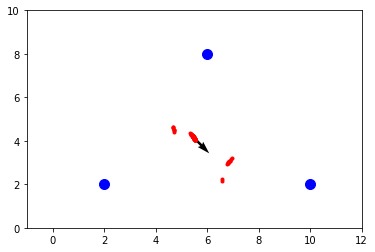

looped


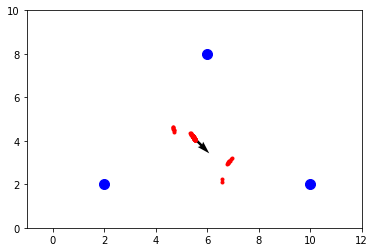

looped


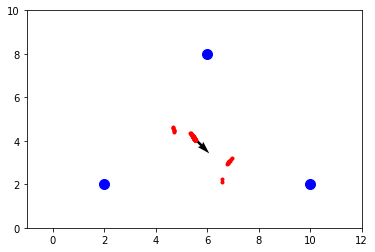

looped


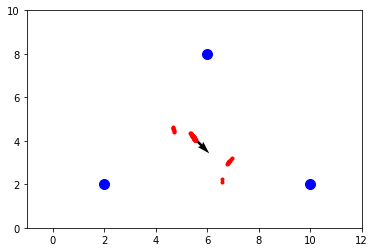

looped


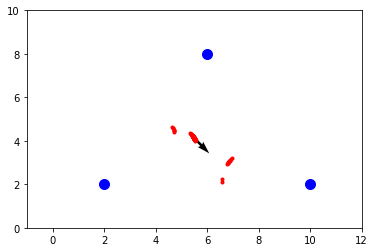

looped


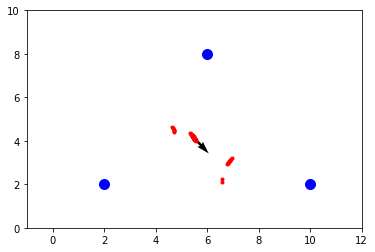

looped


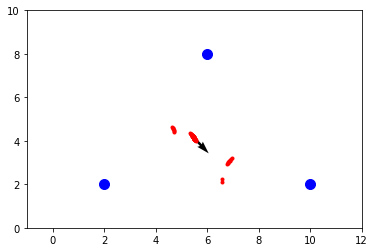

looped


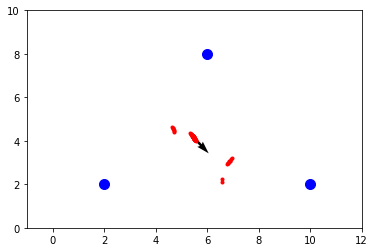

looped


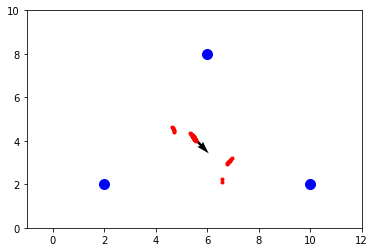

looped


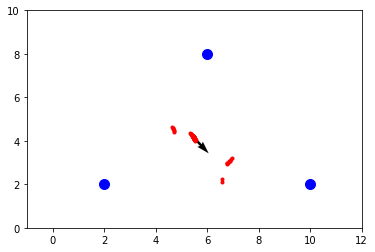

looped


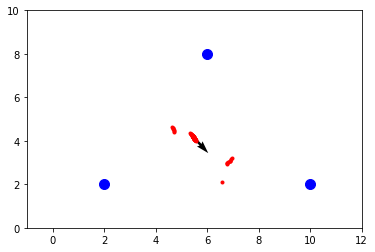

looped


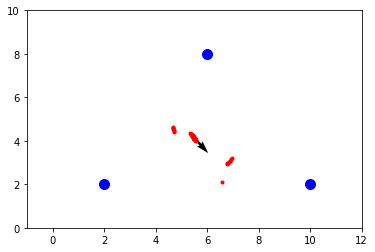

looped


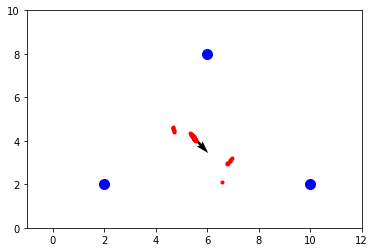

looped


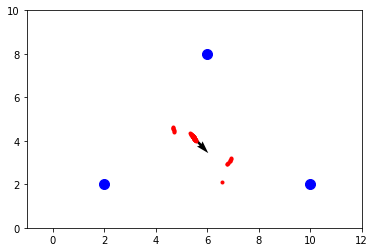

looped


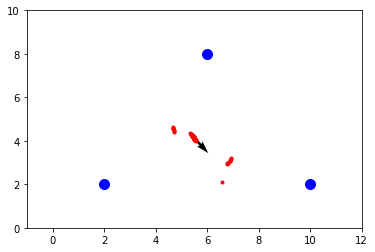

looped


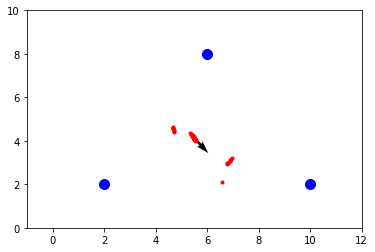

looped


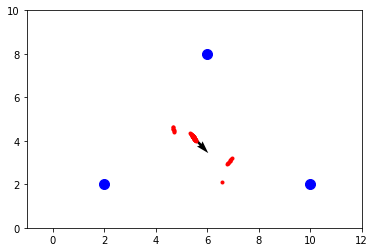

looped


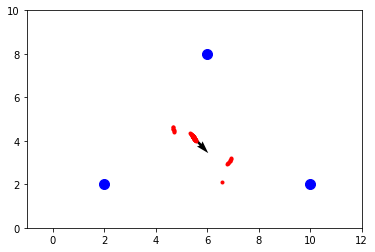

looped


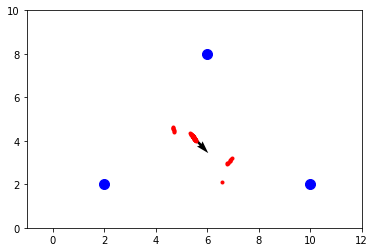

looped


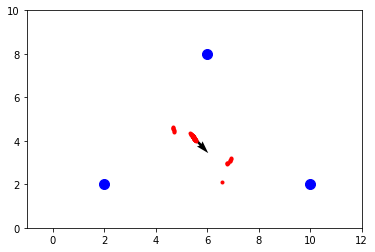

looped


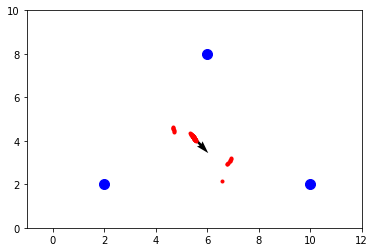

looped


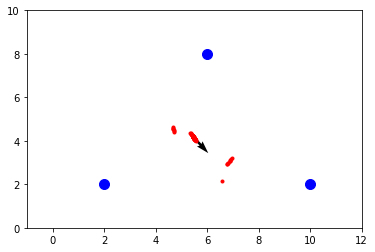

looped


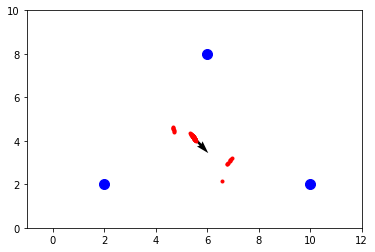

looped


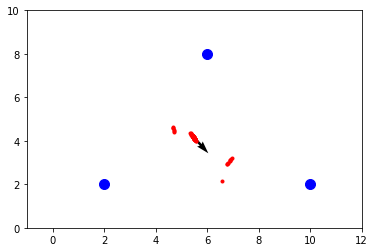

looped


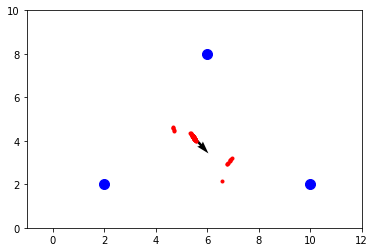

looped


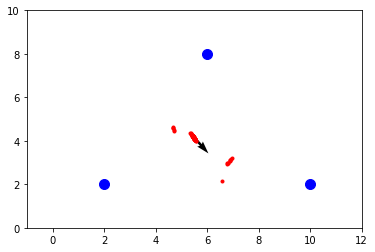

looped


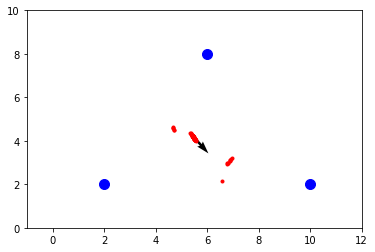

looped


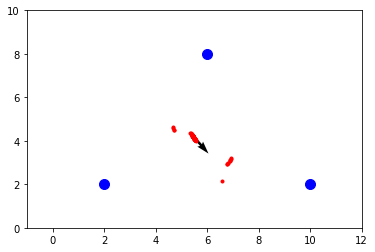

looped


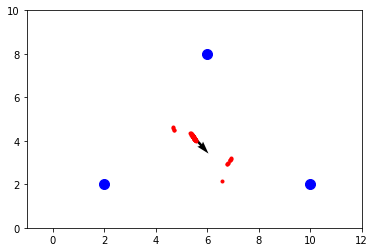

looped


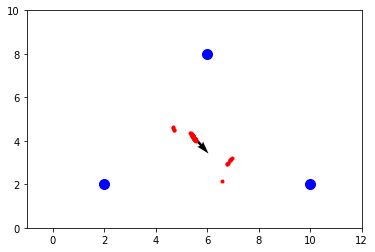

looped


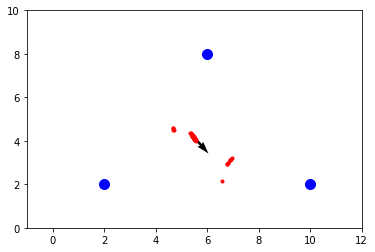

looped


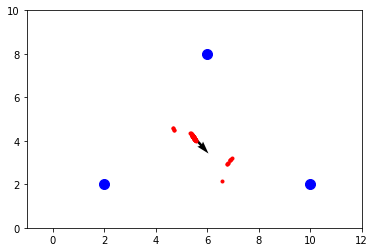

looped


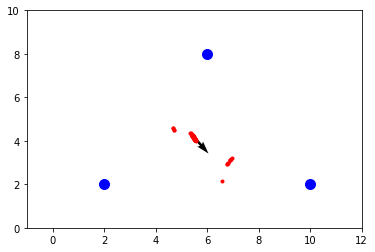

looped


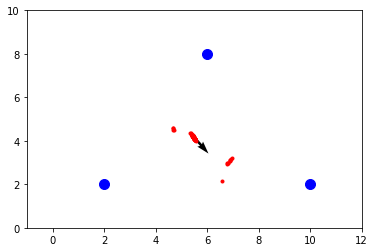

looped


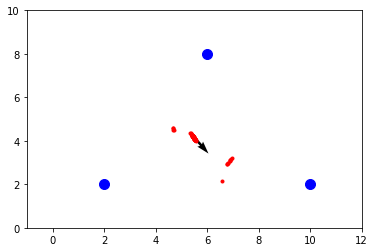

looped


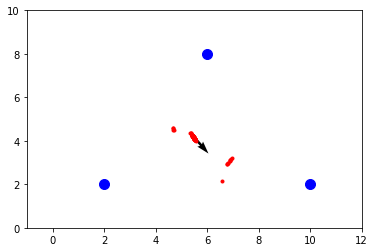

looped


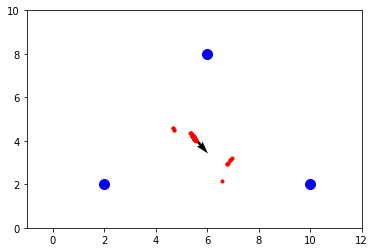

looped


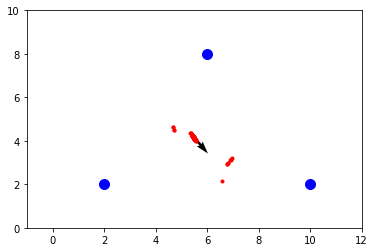

looped


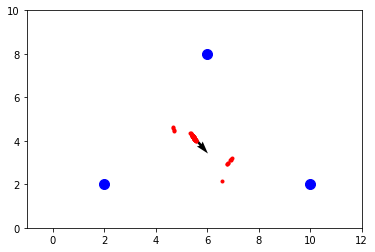

looped


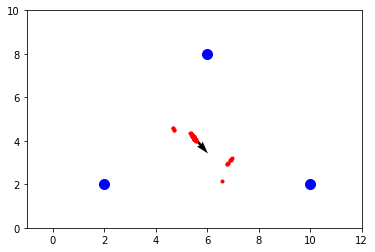

looped


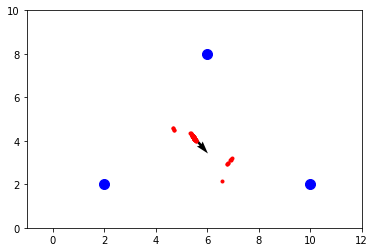

looped


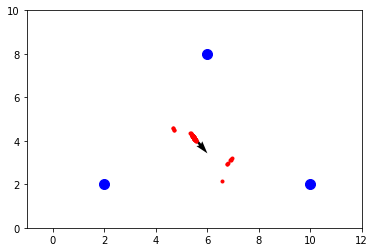

looped


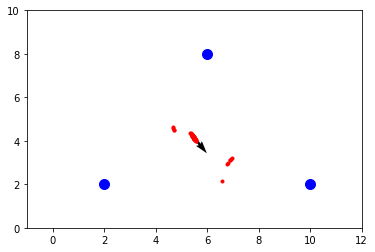

looped


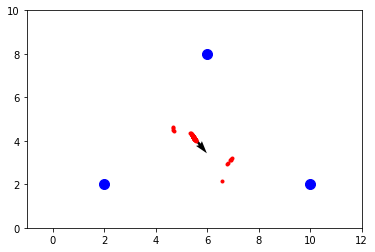

looped


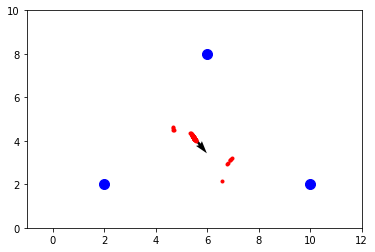

looped


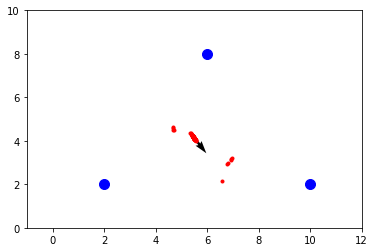

looped


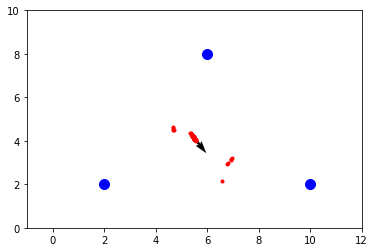

looped


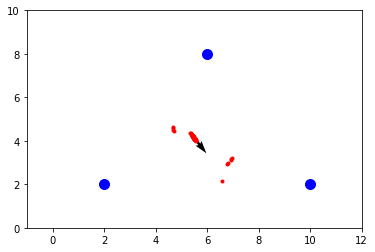

looped


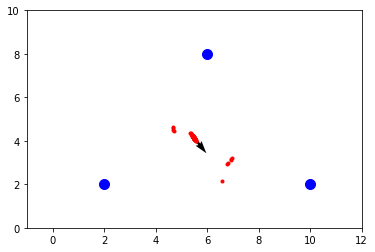

looped


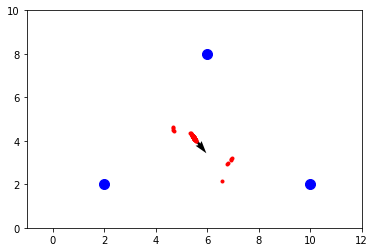

looped


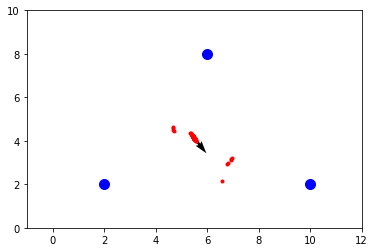

looped


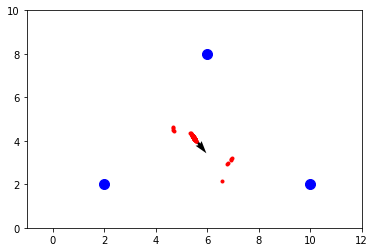

looped


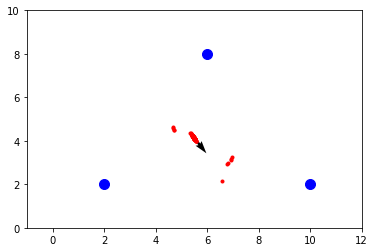

looped


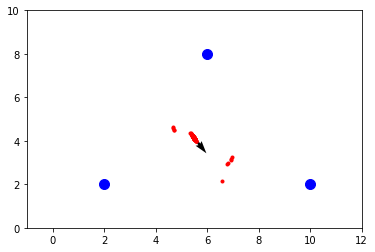

looped


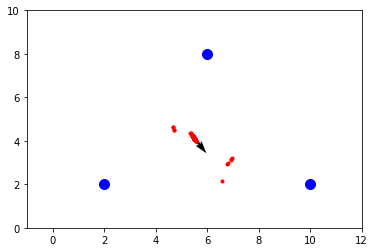

looped


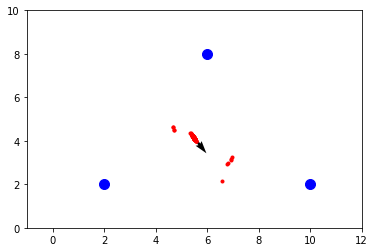

looped


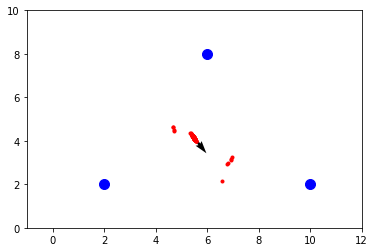

looped


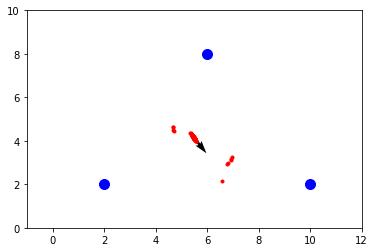

looped


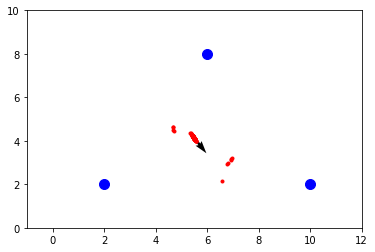

looped


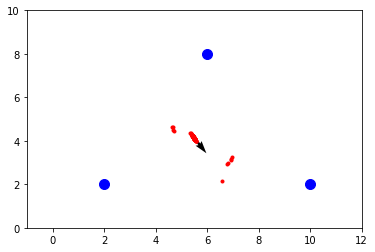

looped


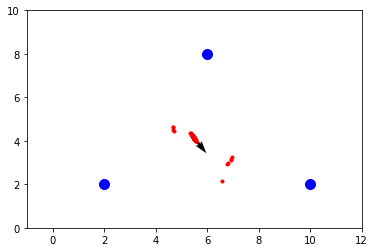

looped


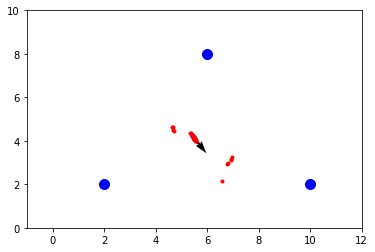

looped


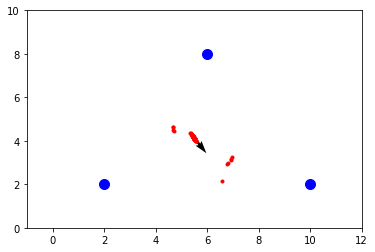

looped


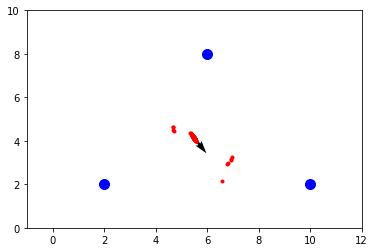

looped


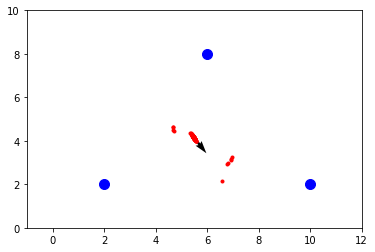

looped


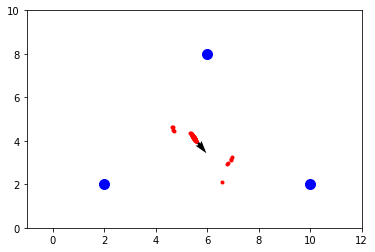

looped


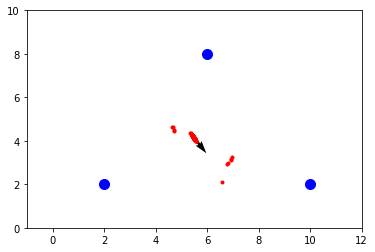

looped


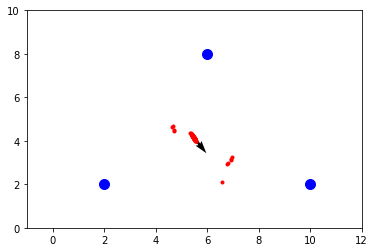

looped


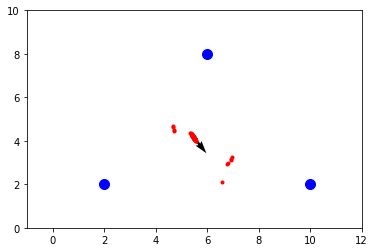

looped


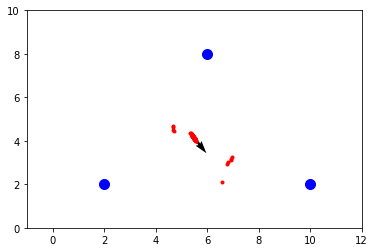

looped


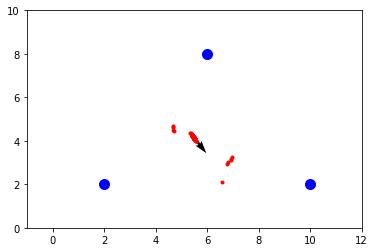

looped


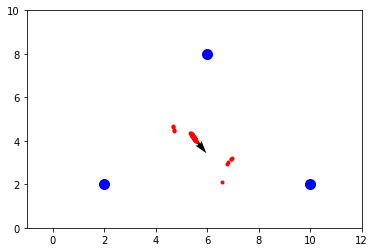

looped


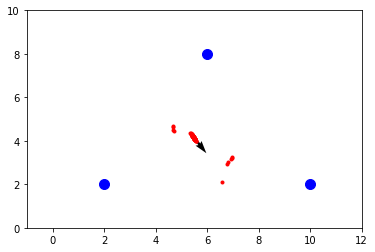

looped


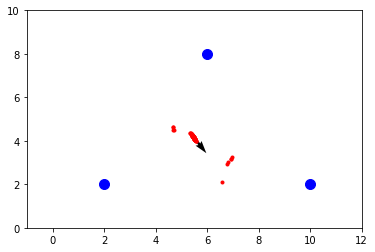

looped


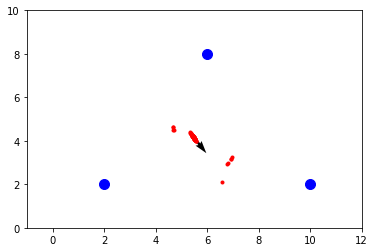

looped


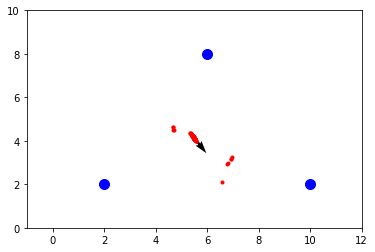

looped


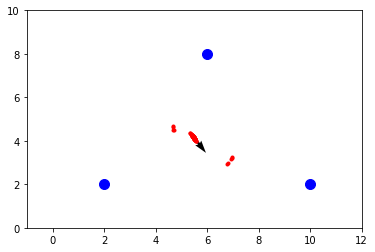

looped


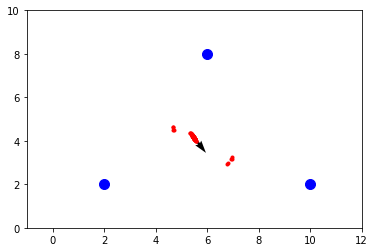

looped


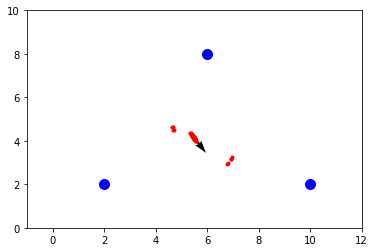

looped


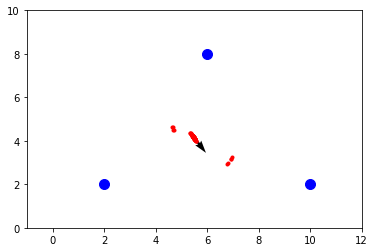

looped


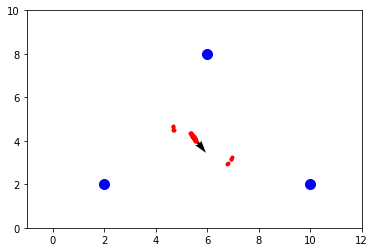

looped


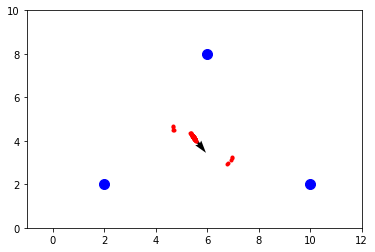

looped


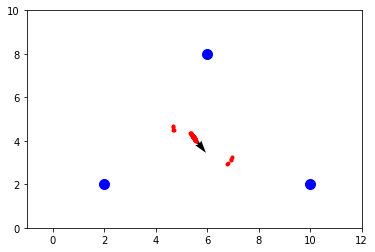

looped


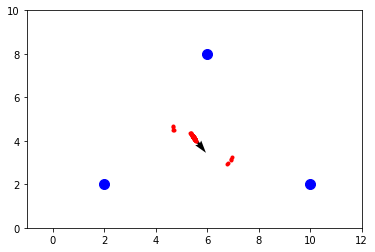

looped


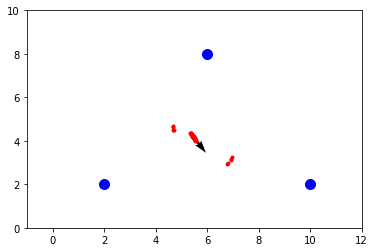

looped


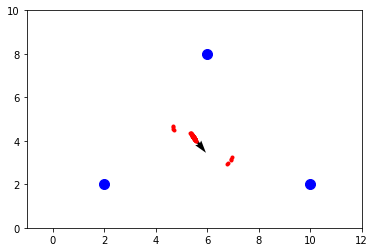

looped


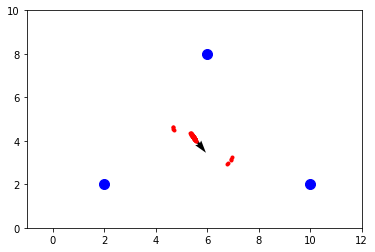

looped


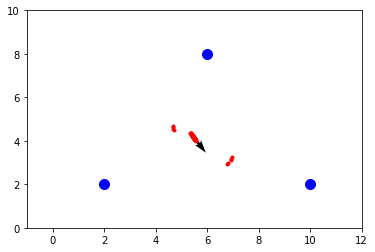

looped


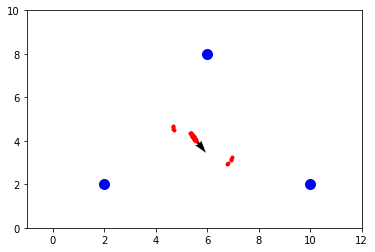

looped


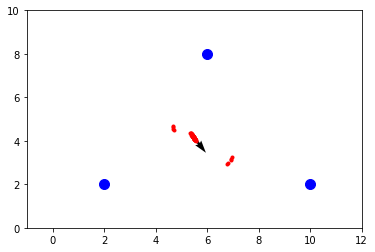

looped


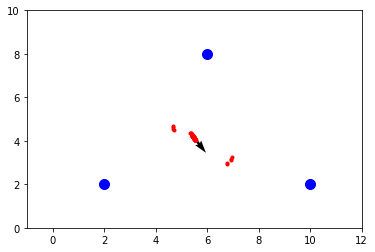

looped


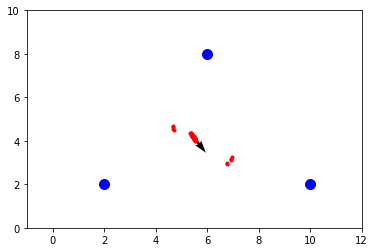

looped


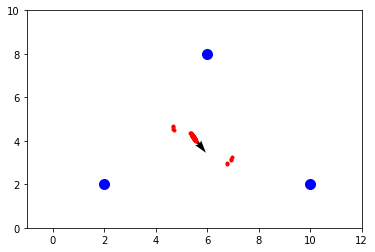

looped


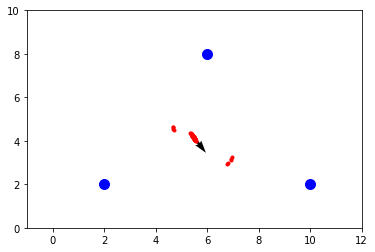

looped


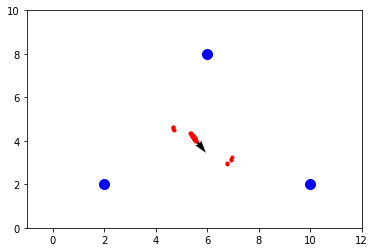

looped


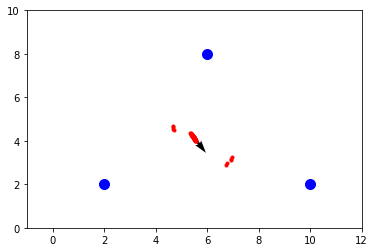

looped


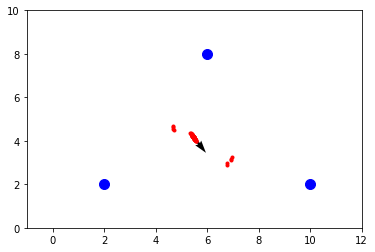

looped


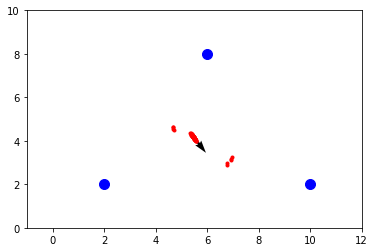

looped


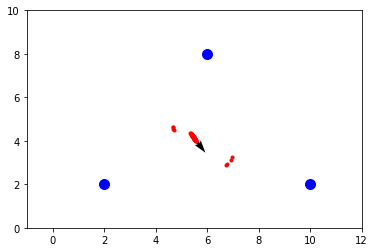

looped


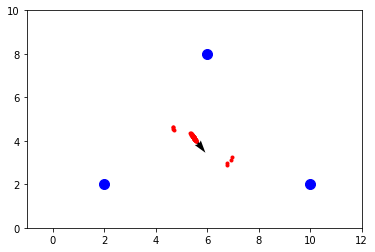

looped


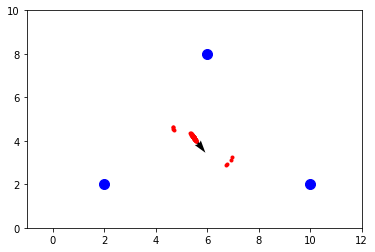

looped


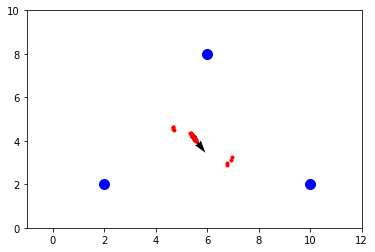

looped


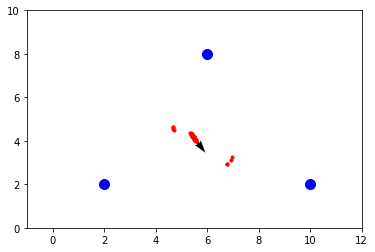

looped


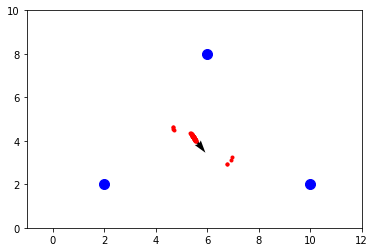

looped


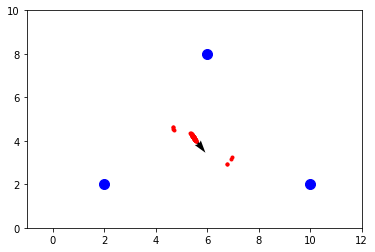

looped


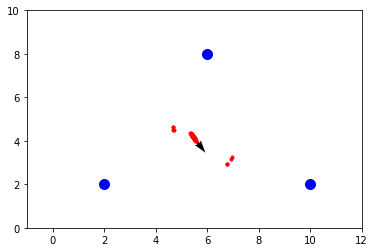

looped


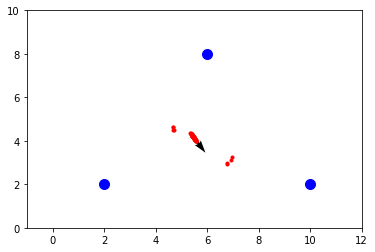

looped


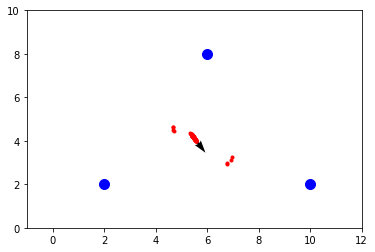

looped


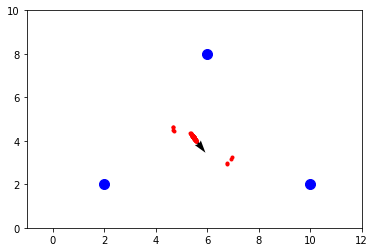

looped


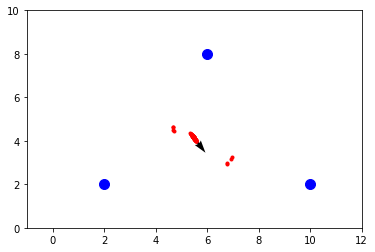

looped


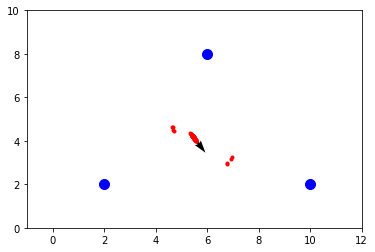

looped


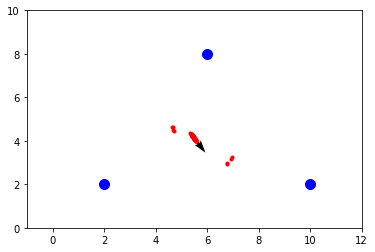

looped


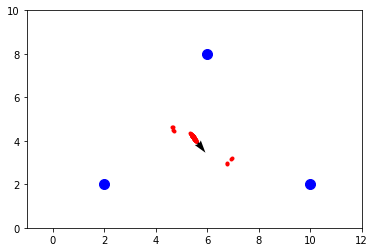

looped


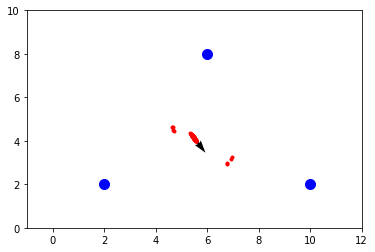

looped


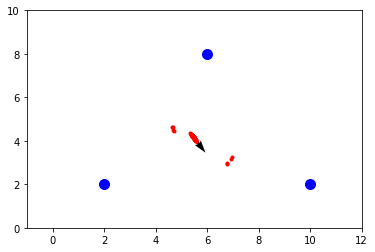

looped


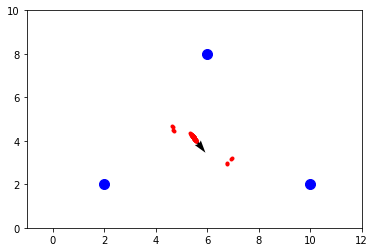

looped


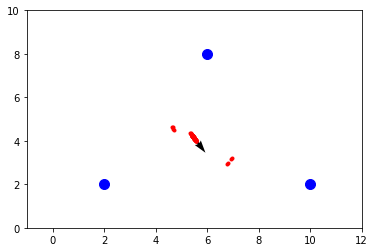

looped


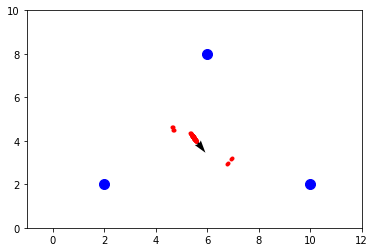

looped


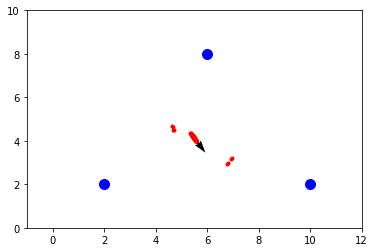

looped


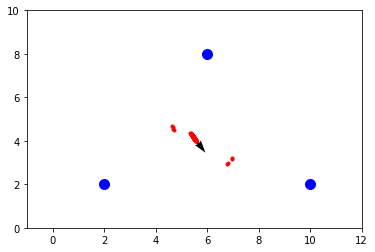

looped


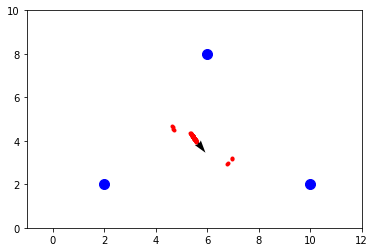

looped


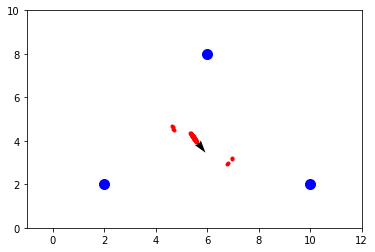

looped


In [3]:
import numpy as np
from numpy.lib.function_base import angle
import scipy.stats
import matplotlib.pyplot as plt
from read_data import read_world, read_sensor_data
import math, random

#add random seed for generating comparable pseudo random numbers
np.random.seed(123)

#plot preferences, interactive plotting mode
plt.axis([-1, 12, 0, 10])
plt.ion()
plt.show()

def plot_state(particles, landmarks, map_limits):
    # Visualizes the state of the particle filter.
    #
    # Displays the particle cloud, mean position and landmarks.
    
    xs = []
    ys = []

    for particle in particles:
        xs.append(particle['x'])
        ys.append(particle['y'])

    # landmark positions
    lx=[]
    ly=[]

    for i in range (len(landmarks)):
        lx.append(landmarks[i+1][0])
        ly.append(landmarks[i+1][1])

    # mean pose as current estimate
    estimated_pose = mean_pose(particles)

    # plot filter state
    plt.clf()
    plt.plot(xs, ys, 'r.')
    plt.plot(lx, ly, 'bo',markersize=10)
    plt.quiver(estimated_pose[0], estimated_pose[1], np.cos(estimated_pose[2]), np.sin(estimated_pose[2]), angles='xy',scale_units='xy')
    plt.axis(map_limits)

    plt.pause(0.01)

def initialize_particles(num_particles, map_limits):
    # randomly initialize the particles inside the map limits

    particles = []

    for i in range(num_particles):
        particle = dict()

        # draw x,y and theta coordinate from uniform distribution
        # inside map limits
        particle['x'] = np.random.uniform(map_limits[0], map_limits[1])
        particle['y'] = np.random.uniform(map_limits[2], map_limits[3])
        particle['theta'] = np.random.uniform(-np.pi, np.pi)

        particles.append(particle)

    return particles

def mean_pose(particles):
    # calculate the mean pose of a particle set.
    #
    # for x and y, the mean position is the mean of the particle coordinates
    #
    # for theta, we cannot simply average the angles because of the wraparound 
    # (jump from -pi to pi). Therefore, we generate unit vectors from the 
    # angles and calculate the angle of their average 

    # save x and y coordinates of particles
    xs = []
    ys = []

    # save unit vectors corresponding to particle orientations 
    vxs_theta = []
    vys_theta = []

    for particle in particles:
        xs.append(particle['x'])
        ys.append(particle['y'])

        #make unit vector from particle orientation
        vxs_theta.append(np.cos(particle['theta']))
        vys_theta.append(np.sin(particle['theta']))

    #calculate average coordinates
    mean_x = np.mean(xs)
    mean_y = np.mean(ys)
    mean_theta = np.arctan2(np.mean(vys_theta), np.mean(vxs_theta))

    return [mean_x, mean_y, mean_theta]

def sample_motion_model(odometry, particles):
    # Samples new particle positions, based on old positions, the odometry
    # measurements and the motion noise 
    # (probabilistic motion models slide)

    delta_rot1 = odometry['r1']
    delta_trans = odometry['t']
    delta_rot2 = odometry['r2']

    # the motion noise parameters: [alpha1, alpha2, alpha3, alpha4]
    noise = [0.1, 0.1, 0.05, 0.05]

    # generate new particle set after motion update
    new_particles = []
    
    '''your code here'''
    '''***        ***'''
    #Odometry data from Delta and produce noise with gaussian using noise vector and Delta vlaues.
    #What is the variance?##################
    for p in particles:
        sig_rot1 = delta_rot1 + np.random.normal(noise[0]*abs(delta_rot1) + noise[1]*delta_trans, 0.002)
        sig_trans = delta_trans + np.random.normal(noise[1]*delta_trans + noise[3]*(abs(delta_rot1)+abs(delta_rot2)), 0.005)
        sig_rot2 = delta_rot2 + np.random.normal(noise[0]*abs(delta_rot2) + noise[1]*delta_trans, 0.002)

        new_particle=dict()
        new_particle['x'] = p['x'] + sig_trans*math.cos(p['theta']+sig_rot1)
        new_particle['y'] = p['y'] + sig_trans*math.sin(p['theta']+sig_rot1)
        new_particle['theta'] = p['theta']+sig_rot1+sig_rot2

        new_particles.append(new_particle)

    return new_particles

def eval_sensor_model(sensor_data, particles, landmarks):
    # Computes the observation likelihood of all particles, given the
    # particle and landmark positions and sensor measurements
    # (probabilistic sensor models slide)
    #
    # The employed sensor model is range only.

    sigma_r = 0.2

    #measured landmark ids and ranges
    ids = sensor_data['id']
    ranges = sensor_data['range']
    # print(sensor_data)
    weights = [1 for i in range(len(particles))]
    # print(weights)
    '''your code here'''
    '''***        ***'''
    #thetas = sensor_data['bearing']
    for i, id in enumerate(ids):
        #print(id)
        l_x = landmarks[id][0]
        l_y = landmarks[id][1]
        for n in range(len(particles)):
            distance=np.power((particles[n]['x'] - l_x)**2 +(particles[n]['y'] - l_y)**2,0.5)
            #theta = math.atan((l_y-particles[n]['y'])/(l_x-particles[n]['x']))-particles[n]['theta']
            #print(scipy.stats.norm(distance,500).pdf(ranges[i]))
            weights[n] *= scipy.stats.norm(distance,10).pdf(ranges[i])
            #weights[n] *= scipy.stats.norm(theta,10).pdf(thetas[i])
    

    weights = [weights[i]+1.e-300 for i in range(len(weights))] # avoid round-off to zero
    #normalize weights
    normalizer = sum(weights)
    # print("wwwwww")
    # print(weights)
    # print()
    # print(normalizer)
    weights = [w/normalizer for w in weights]
    # print(weights)
    return weights

#####
##### Uncomment below for KLD sampling but comment similar function below for Universal stochastic sampling. Uncommented by default.
#####

def resample_particles(particles, weights):
    # Returns a new set of particles obtained by performing
    # stochastic universal sampling, according to the particle weights.

    new_particles = []
    new_weights = []

    '''your code here'''
    '''***        ***'''
    # print("P Start")
    # print(particles)
    N = len(weights)
    positions = (np.arange(N) + np.random.random()) / N
    # print(positions)
    indexes = np.zeros(N, 'i')
    cumulative_sum = np.cumsum(weights)
    i, j = 0, 0
    while i < N and j<N:
        if positions[i] < cumulative_sum[j]:
            indexes[i] = j
            i += 1
        else:
            j += 1

    # print((indexes))
    # print(weights)
    for ind in indexes:
        if (weights[ind]>0.001):
            new_particles.append(particles[ind])
            new_weights.append(weights[ind])
    
    weights /= np.sum(weights)


    new_particles
    # print(new_particles)

    return new_particles



def binSearch(wheel, num):
    mid = len(wheel)//2
    low, high, answer = wheel[mid]
    if low<=num and num<=high:
        return answer
    elif low < num:
        return binSearch(wheel[mid+1:], num)
    else:
        return binSearch(wheel[:mid], num)


#def resample_particles(particles, weights):
    # Returns a new set of particles obtained by performing
    # stochastic universal sampling, according to the particle weights.

    new_particles = []
    new_weights = []

    '''your code here'''
    '''***        ***'''
    wheel = []
    total = sum(w for w in weights)
    top = 0
    for i,w in enumerate(weights):
        f = w/total
        wheel.append((top, top+f, particles[i]))
        top += f

    N=100
    stepSize = 1.0/N
    answer = []
    r = random.random()
    answer.append(binSearch(wheel, r))
    while len(answer) < N:
        r += stepSize
        if r>1:
            r %= 1
        answer.append(binSearch(wheel, r))

    new_particles=answer
    return new_particles

def main():
    # implementation of a particle filter for robot pose estimation

    print("Reading landmark positions")
    landmarks = read_world("../data/world.dat")

    print("Reading sensor data")
    sensor_readings = read_sensor_data("../data/sensor_data3.dat") #Can append index starting from sensor_data2.dat to test other data
    #print(sensor_readings)
    #initialize the particles
    map_limits = [-1, 12, 0, 10]
    particles = initialize_particles(100, map_limits)

    #run particle filter
    for timestep in range(int(len(sensor_readings)/2)):

        #plot the current state
        plot_state(particles, landmarks, map_limits)

        #predict particles by sampling from motion model with odometry info
        new_particles = sample_motion_model(sensor_readings[timestep,'odometry'], particles)

        #calculate importance weights according to sensor model
        weights = eval_sensor_model(sensor_readings[timestep, 'sensor'], new_particles, landmarks)

        #resample new particle set according to their importance weights
        particles = resample_particles(new_particles, weights)
        print('looped')
    plt.show('hold')

if __name__ == "__main__":
    main()